In [14]:
from TimeDelay_Neuron_DDF_GaussianForm import *
import numpy as np
import time
import matplotlib.pyplot as plt
import random
random.seed()
np.random.seed()

In [15]:
# modify this
use_neuron_index = 3
neuron_txt_filename = 'Episode_2_voltage.txt'
epoch = None # also called "episode". set to None if not specified

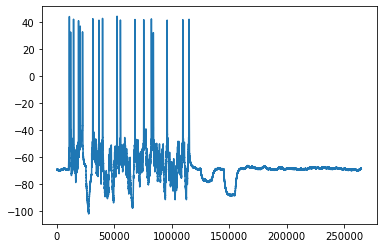

In [16]:
# ======== do not modify below ==========
neuron_name_list = ['Neuron_52_6-8-16',
                    'Neuron_57_6-8-16',
                    'Neuron_61_6-8-16',
                    'Neuron_8-15-2019']
directories_list = ['HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 52/',
                   'HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 57/',
                   'HVC_ra_x_i_data_2016_2019/50 KhZ Recordings - 06_08_16/50KhZ-06_08_16/50KhZ-06_08_16/Neuron 61/',
                   'HVC_ra_x_i_data_2016_2019/08-15-2019/']

# Voltage = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_voltage.txt')
# Current = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_current.txt')
'Example/NaKL_L63_X_Driven_70k_h=02.npy'
# Voltage = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_voltage.txt')
# Current = np.loadtxt(directories_list[use_neuron_index]+'Episode_2_current.txt')
plt.figure()
plt.plot(Voltage)
plt.show()

In [21]:
tau = 1
D = 3
length = 50000
Xdata = Voltage
TT = 0.02
NoCenters = 1000

DDF = Gauss()
Center = DDF.KmeanCenter(Xdata,NoCenters,D,length,tau)
np.savetxt('centers/Center '+neuron_name_list[use_neuron_index]+'.txt',Center)
np.loadtxt('centers/Center '+neuron_name_list[use_neuron_index]+'.txt')
# Center = np.load('Example/Centers_train25k_5k_D'+str(D)+'_tau'+str(tau)+'.npy')

array([[-50.50967943, -50.23143096, -50.24489461],
       [-69.6725387 , -69.310431  , -69.64541908],
       [ 21.616821  ,  18.6871335 ,  14.9868775 ],
       ...,
       [-88.50957103, -88.71247162, -88.49843622],
       [-55.15074488, -55.46998271, -55.47417139],
       [-80.49447785, -80.63310005, -80.30387229]])

In [27]:
stim = Current
Pdata = Voltage
PreLength = 25000
t_start  = length # feel free to change this, as long as it's bigger than length
assert(t_start >= length)
X = np.arange(t_start,t_start+PreLength*TT,TT)
beta_arr,R_arr = [10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3],[10e-3,10e-2,10e-1,10e0,10e1,10e2,10e3]
bias = length

0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0
0.01
0.1
1.0
10.0
100.0
1000.0
10000.0


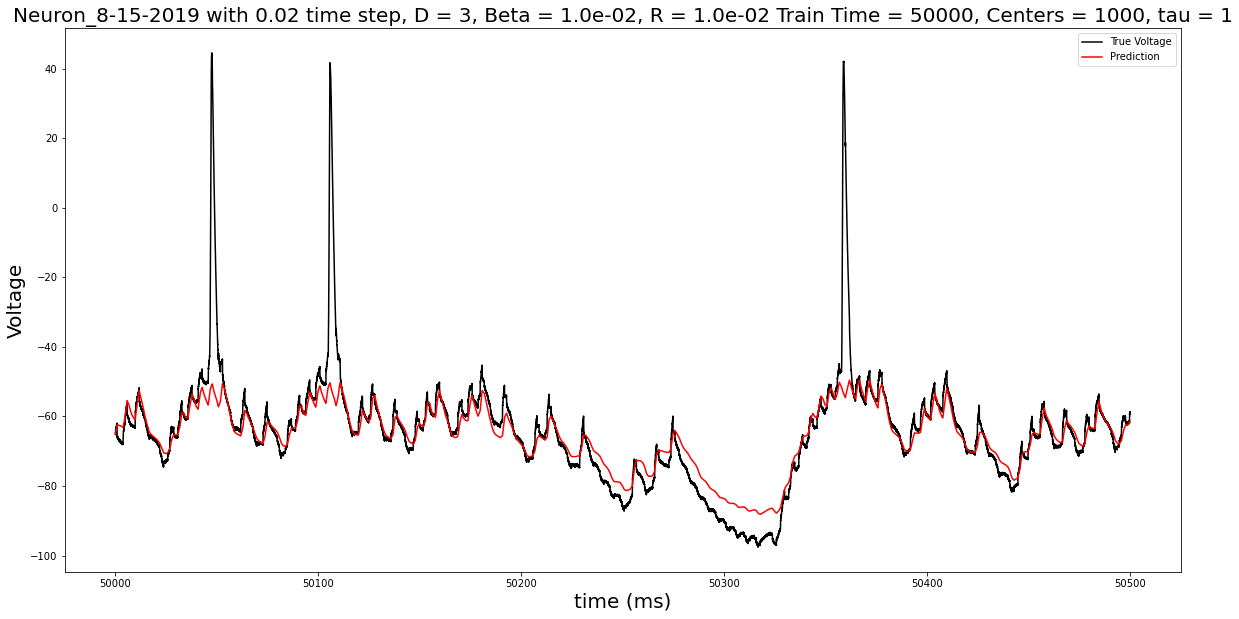

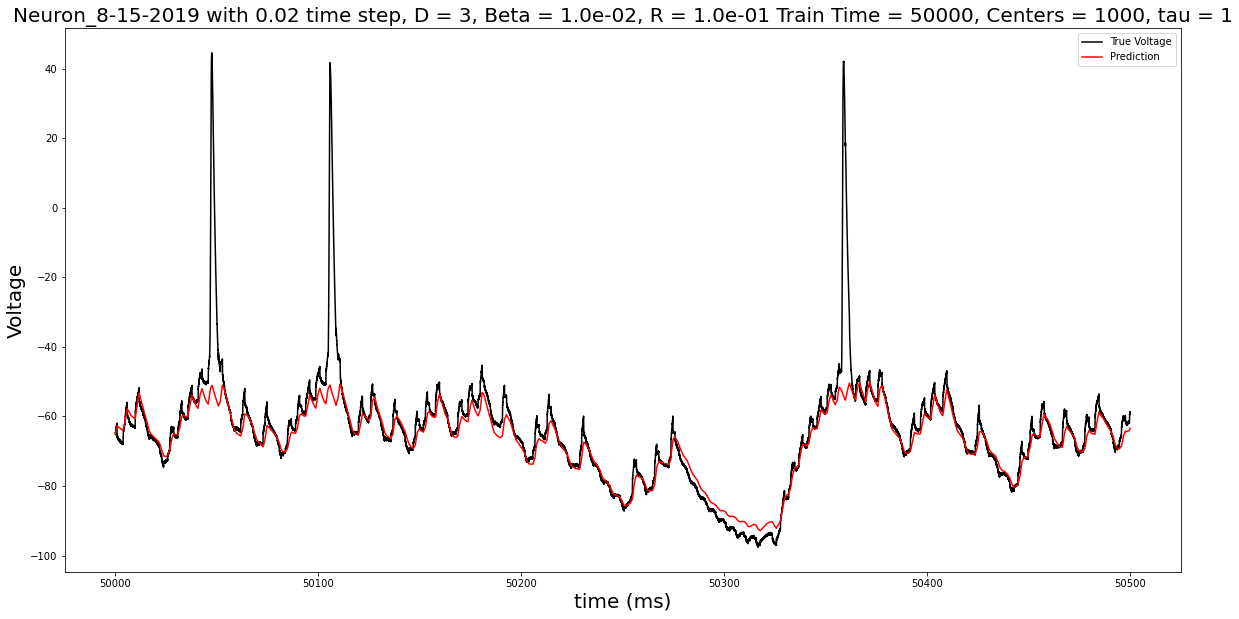

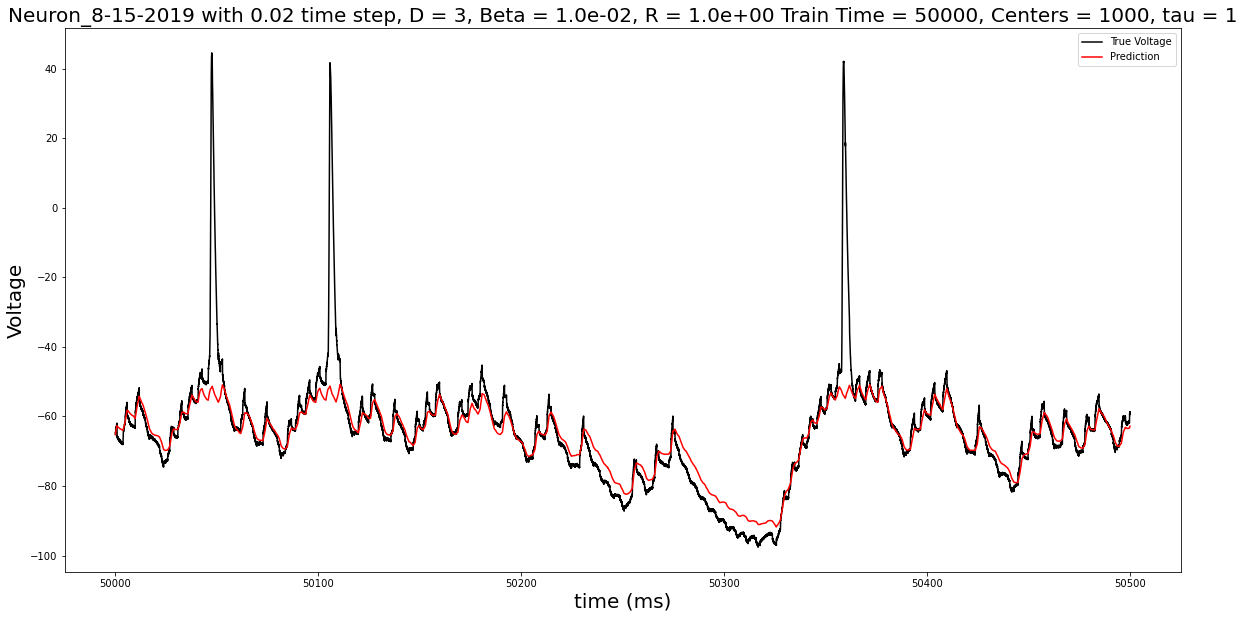

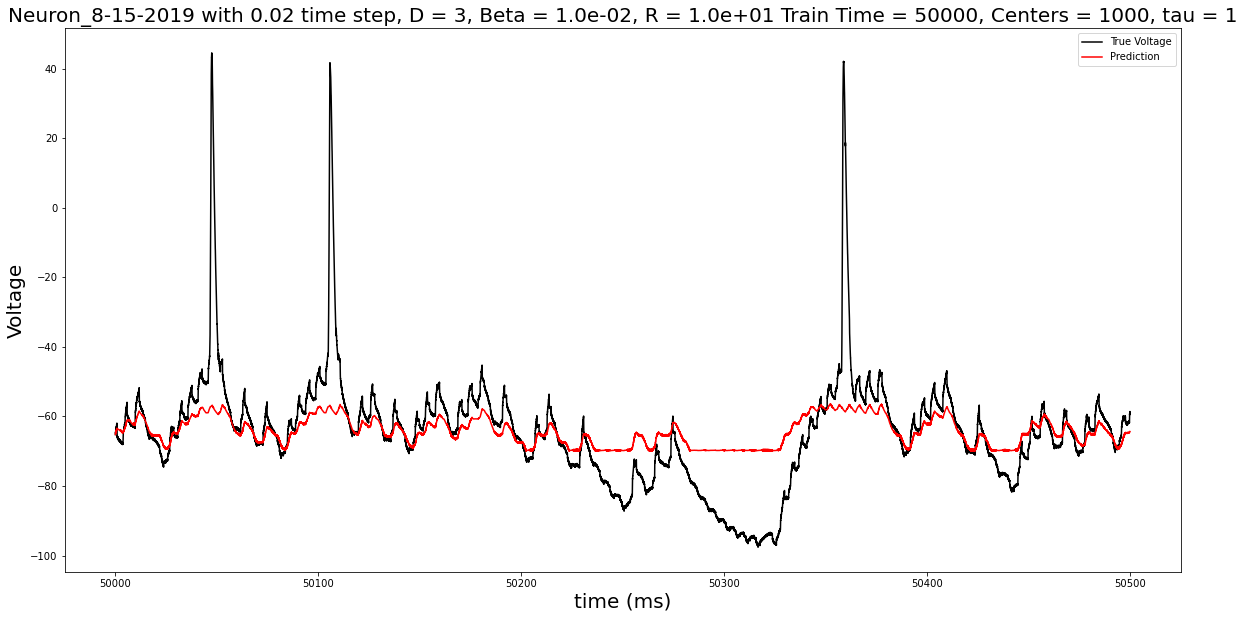

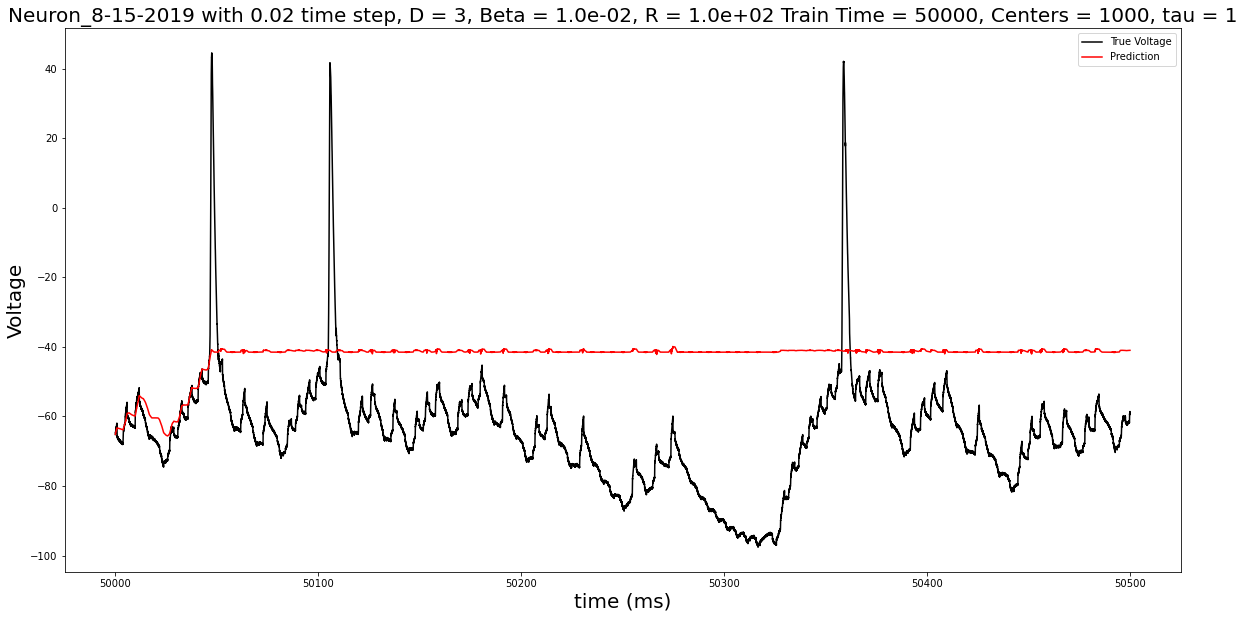

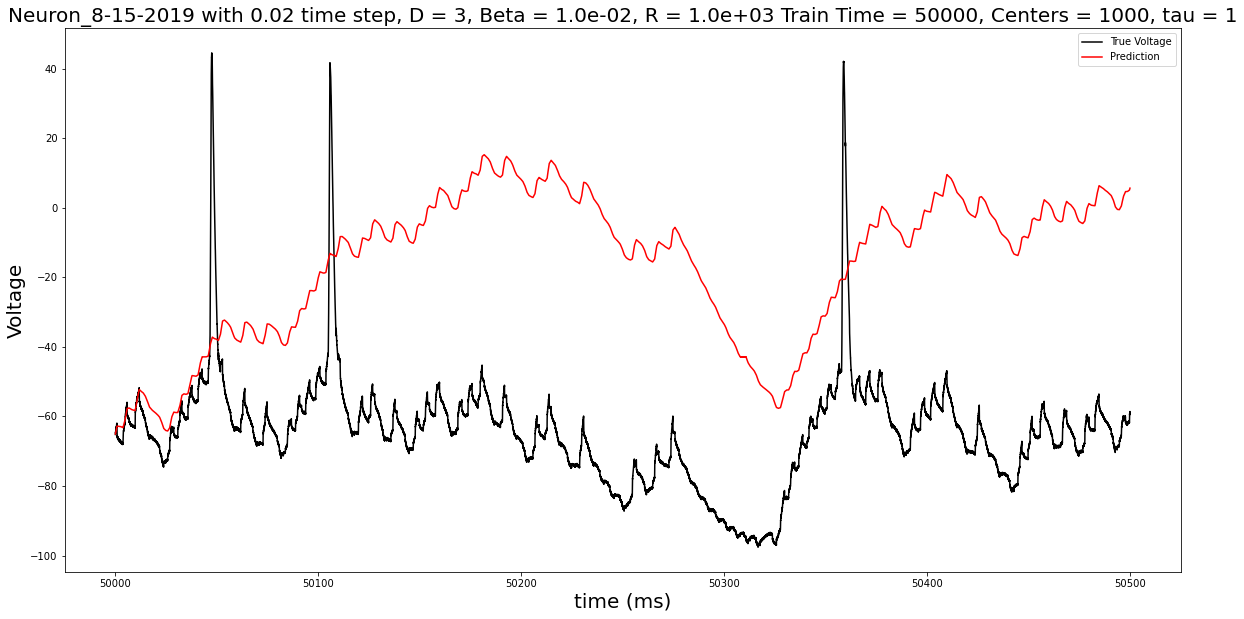

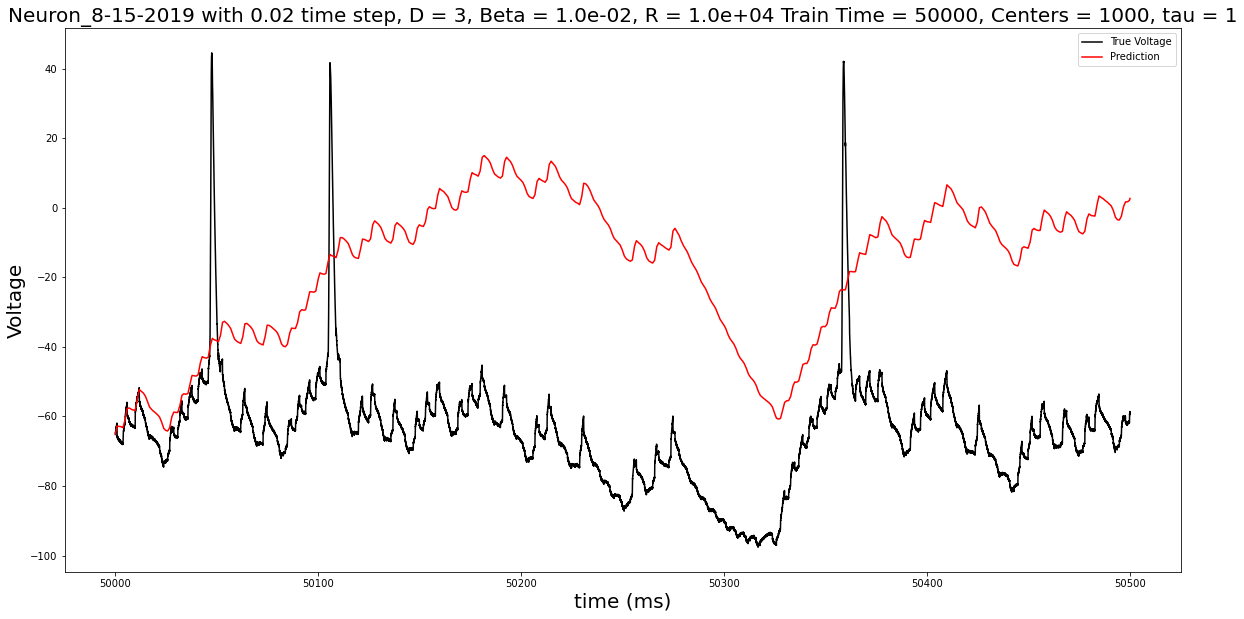

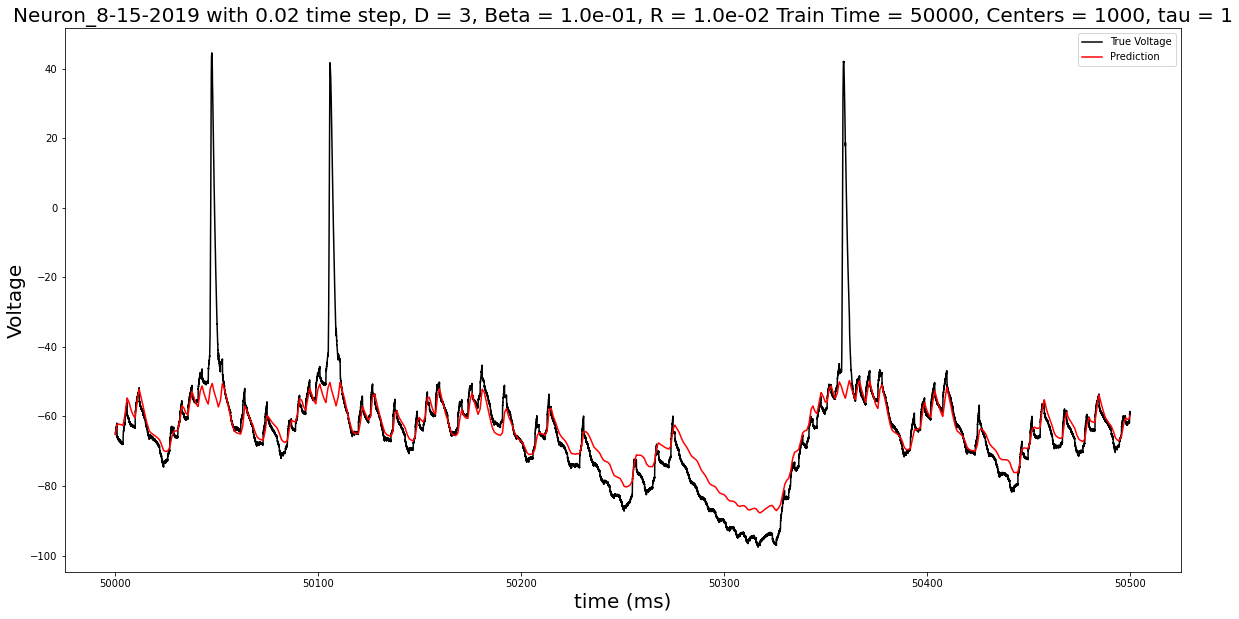

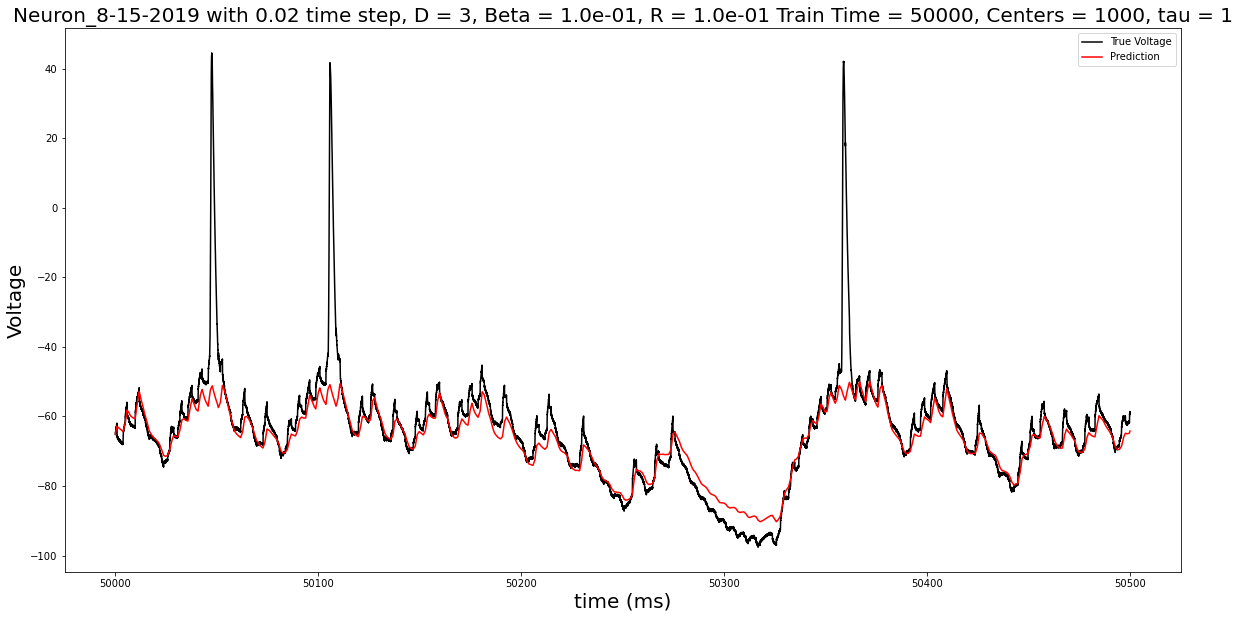

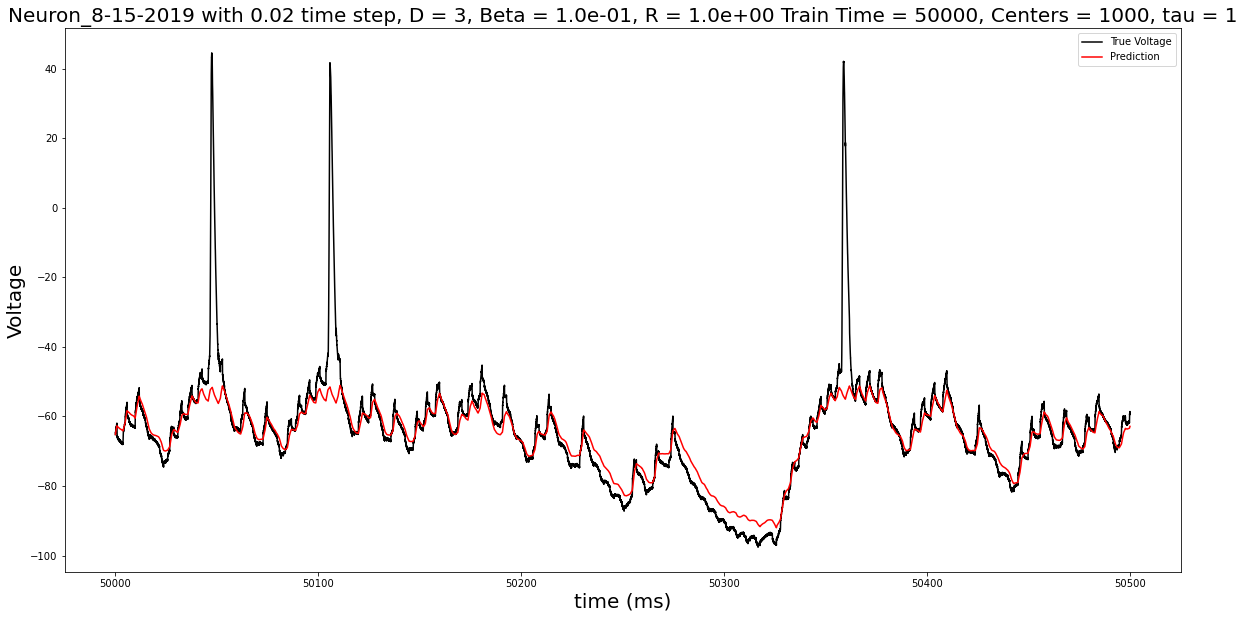

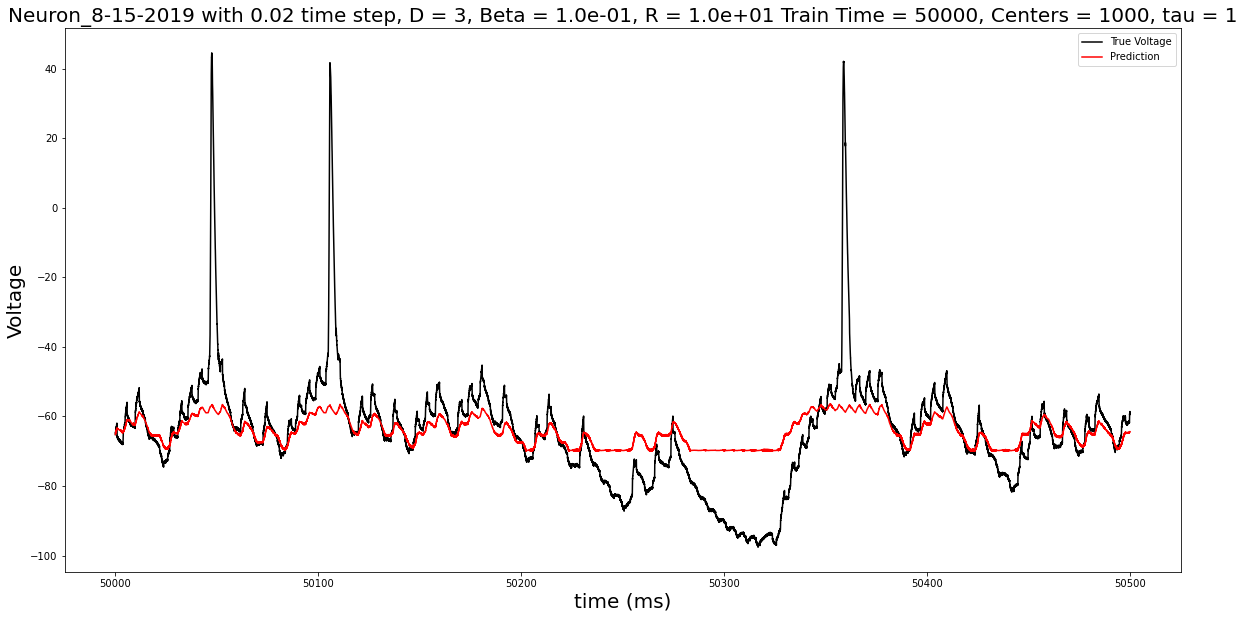

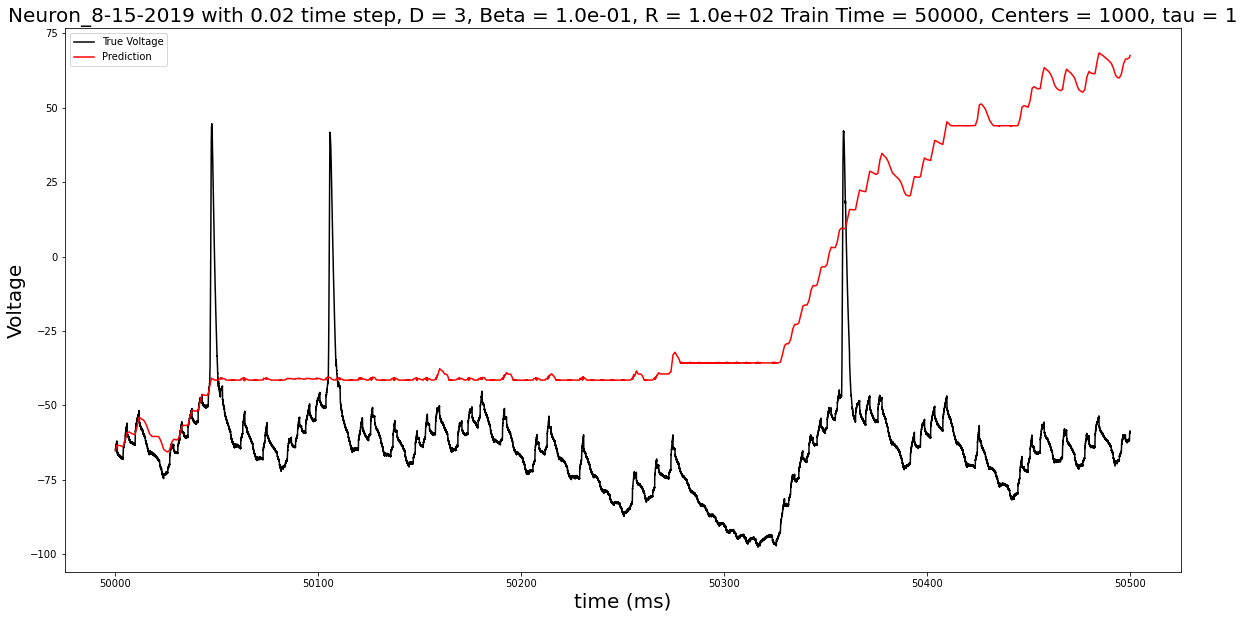

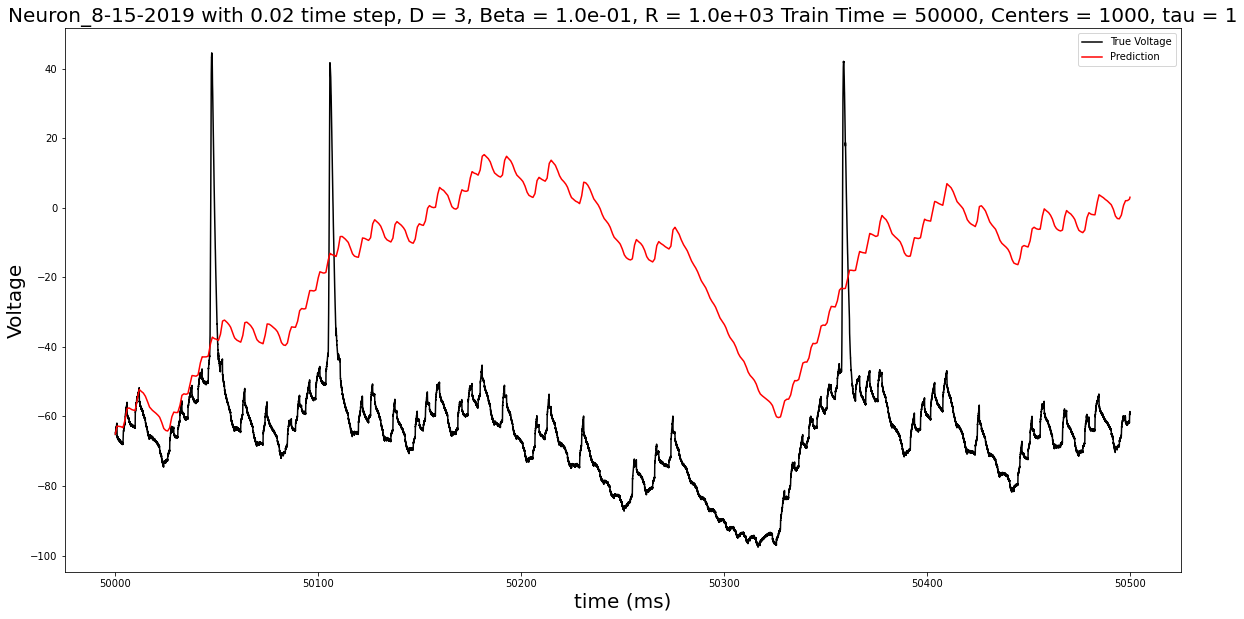

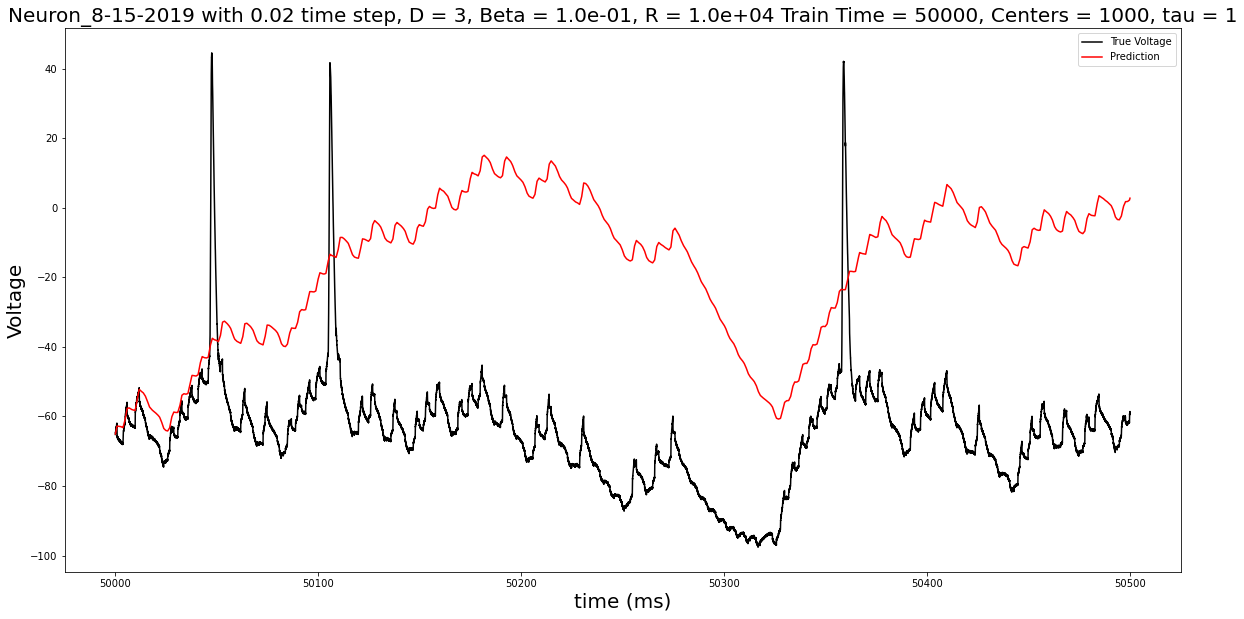

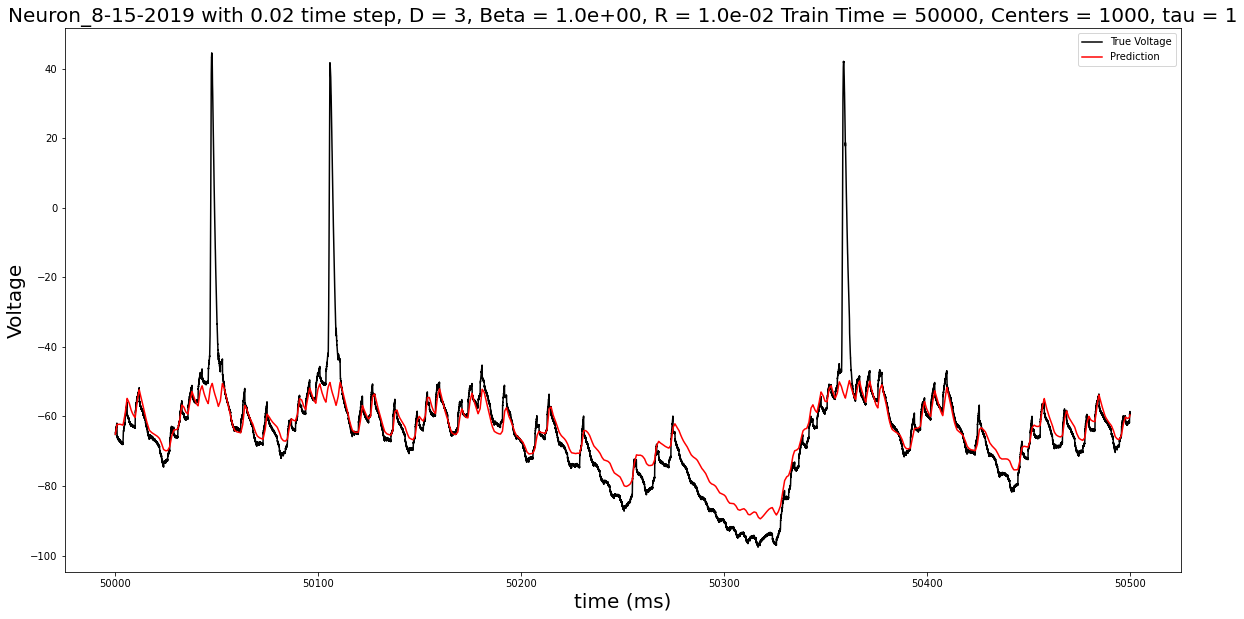

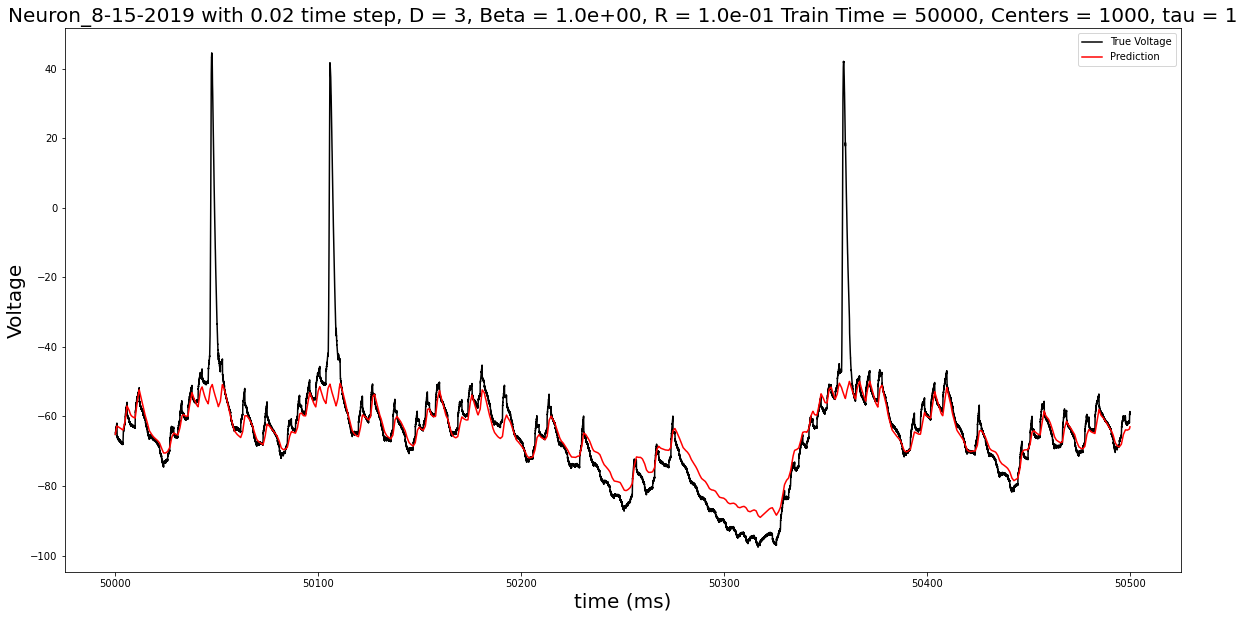

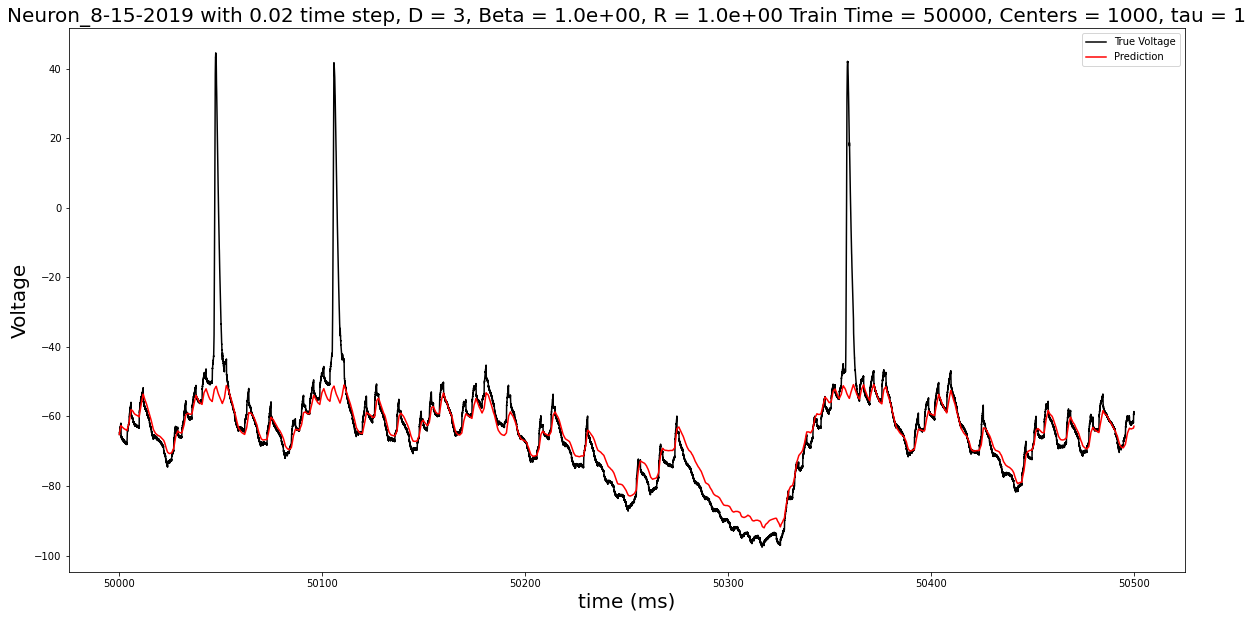

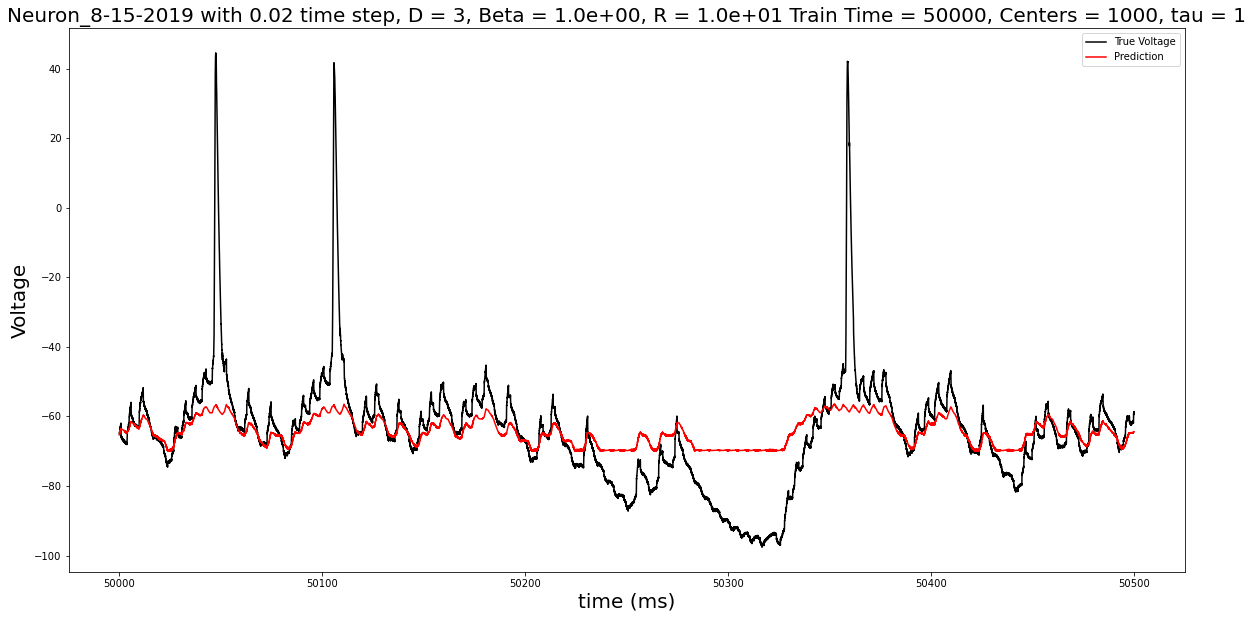

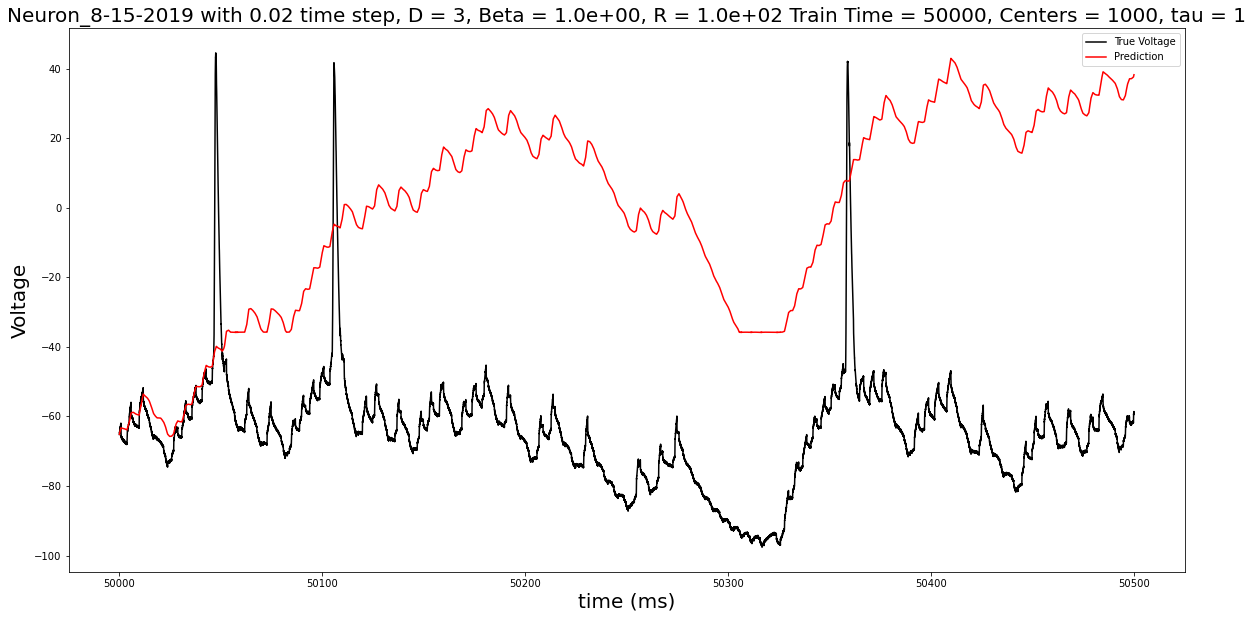

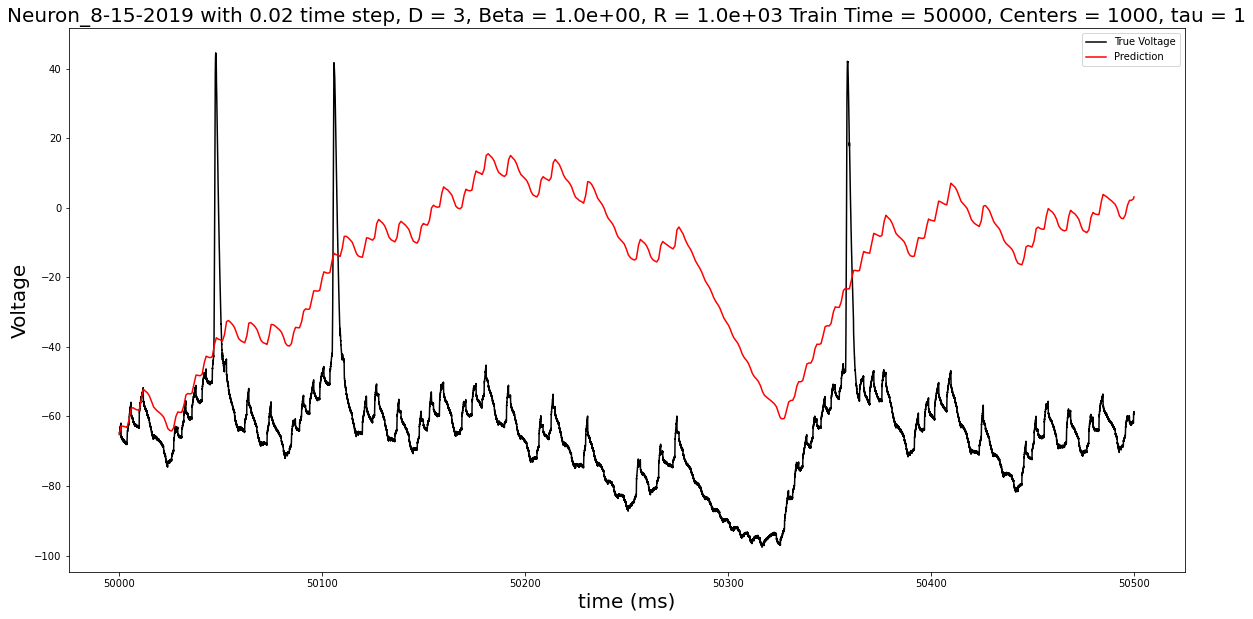

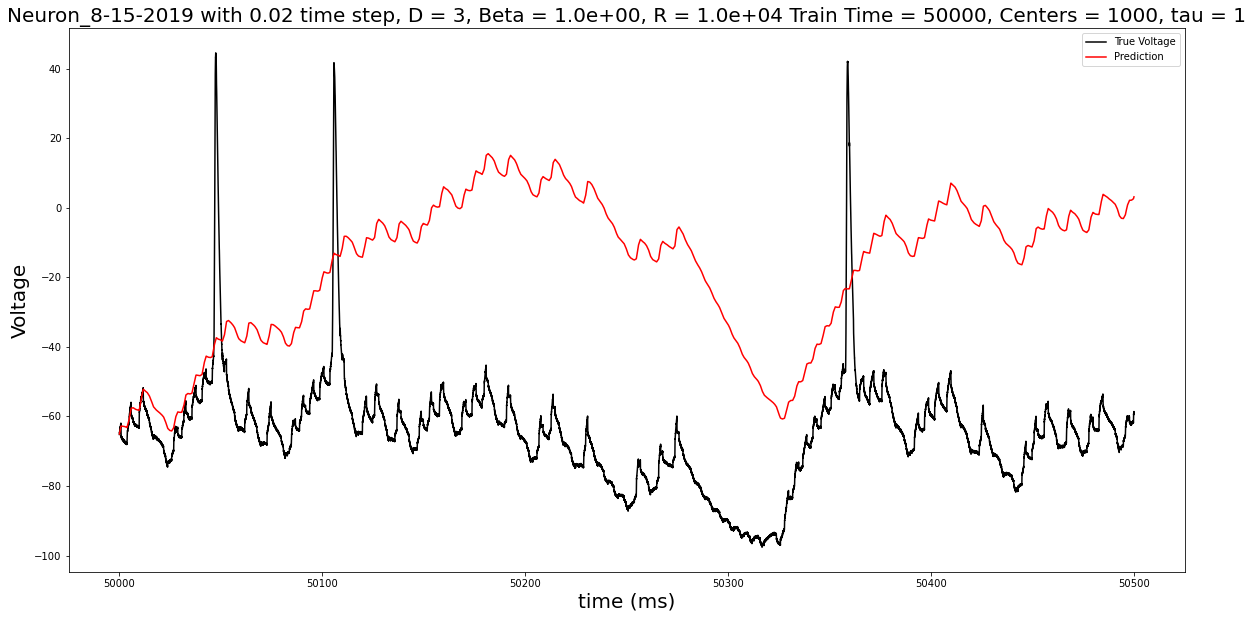

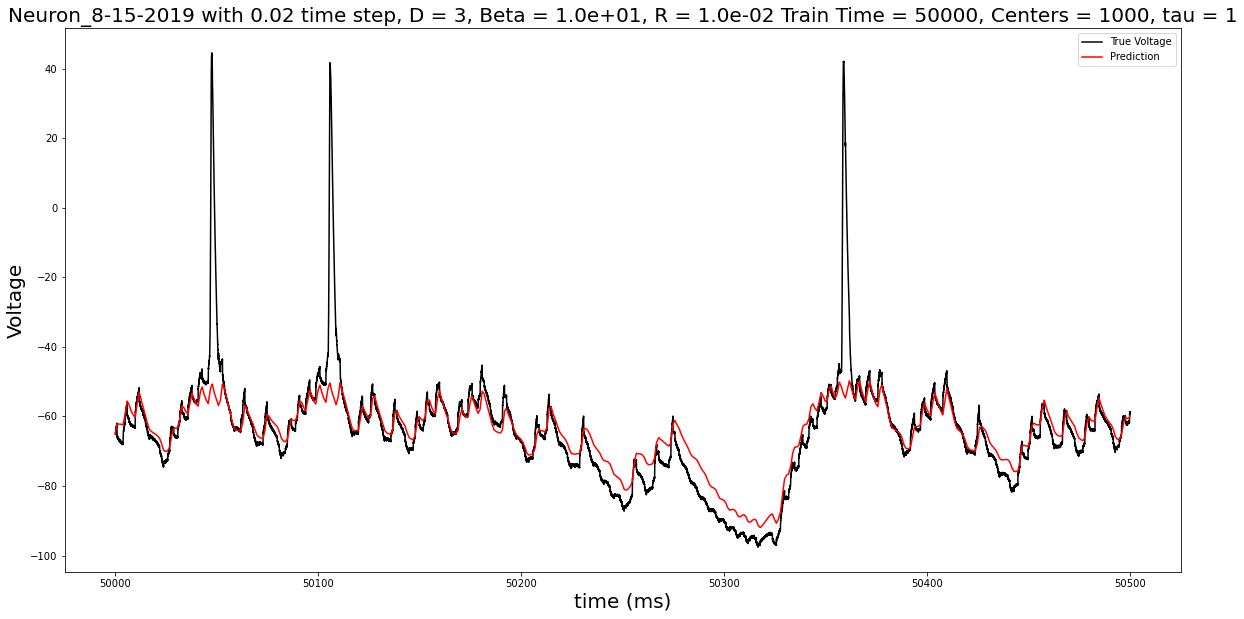

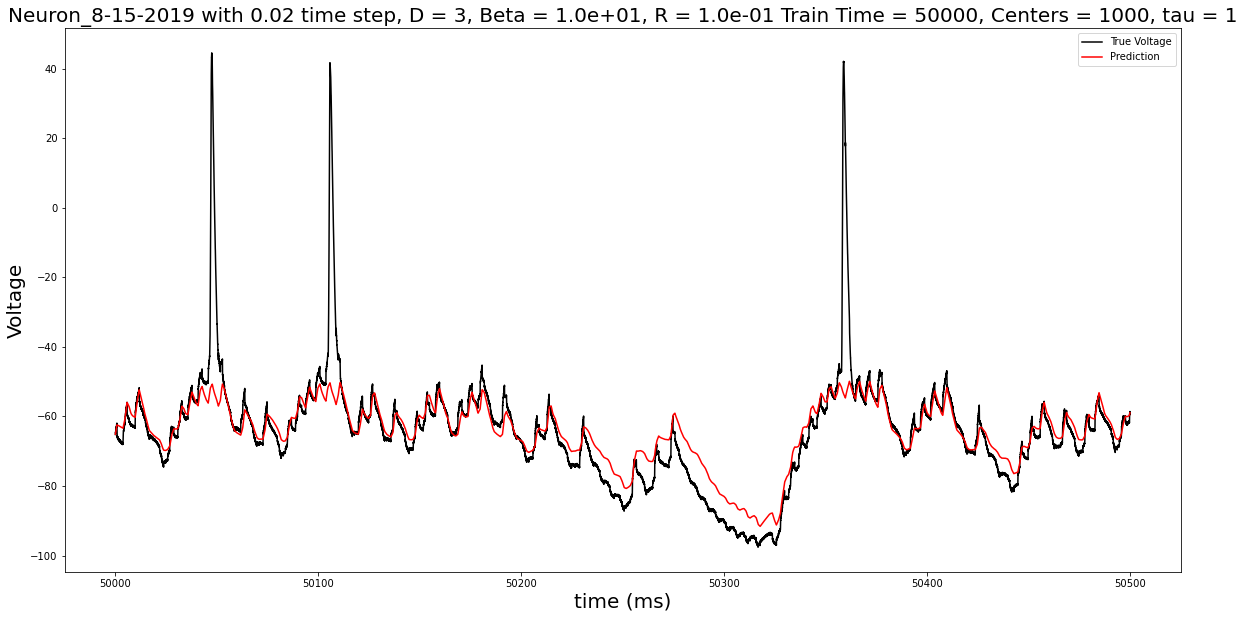

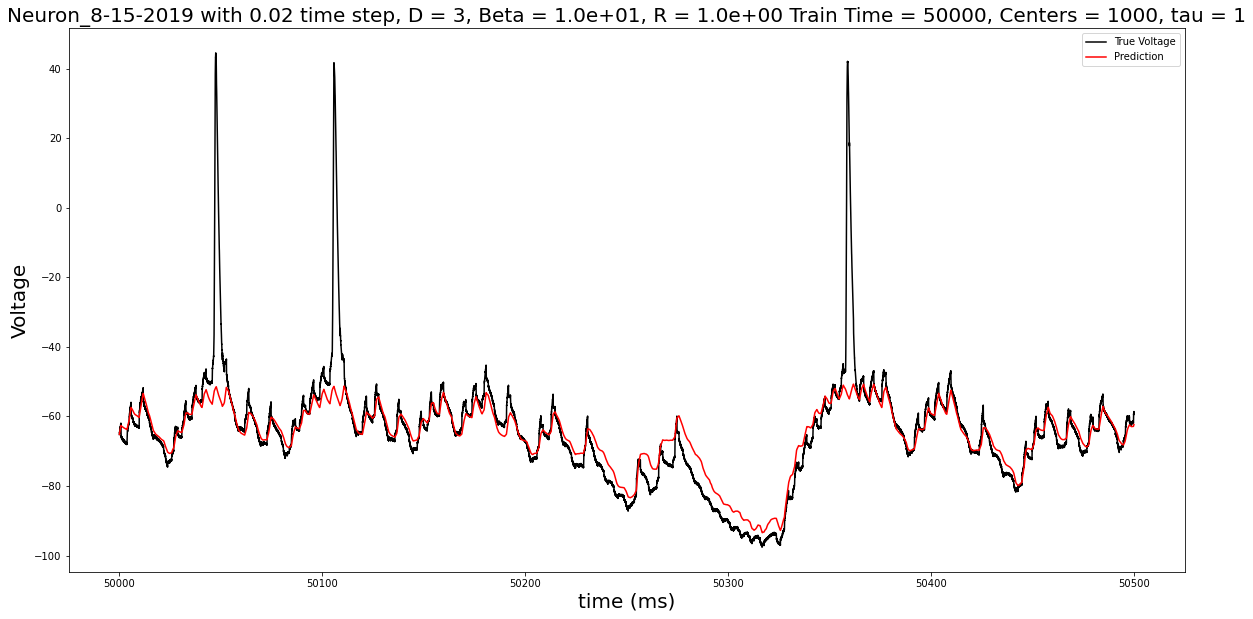

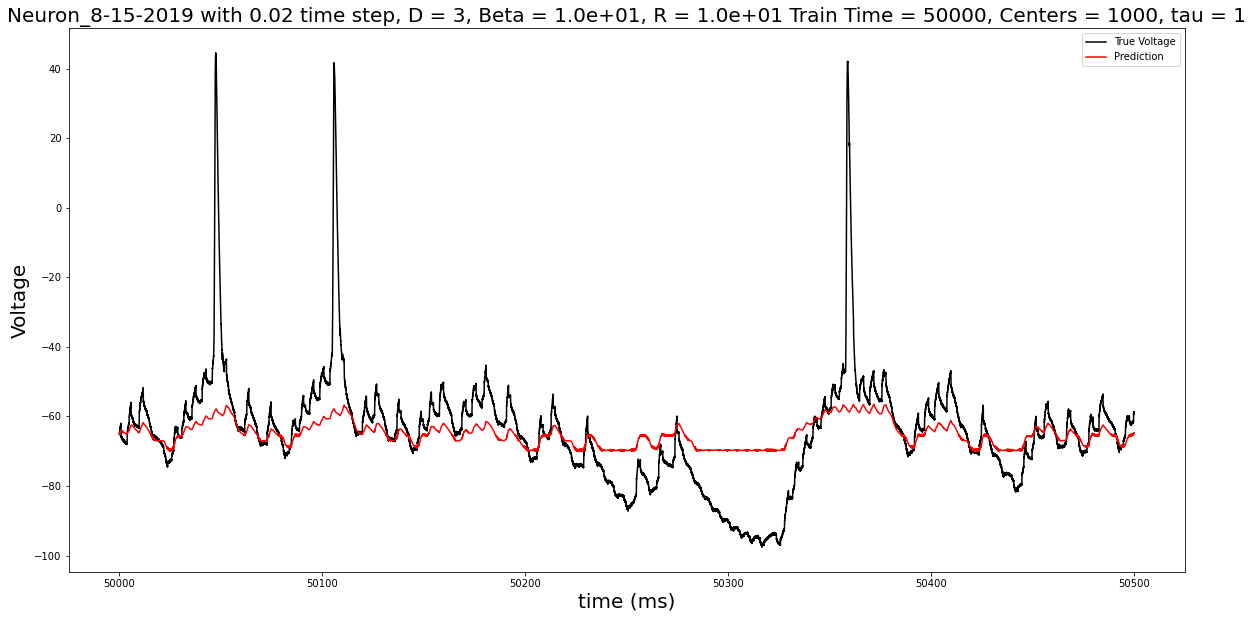

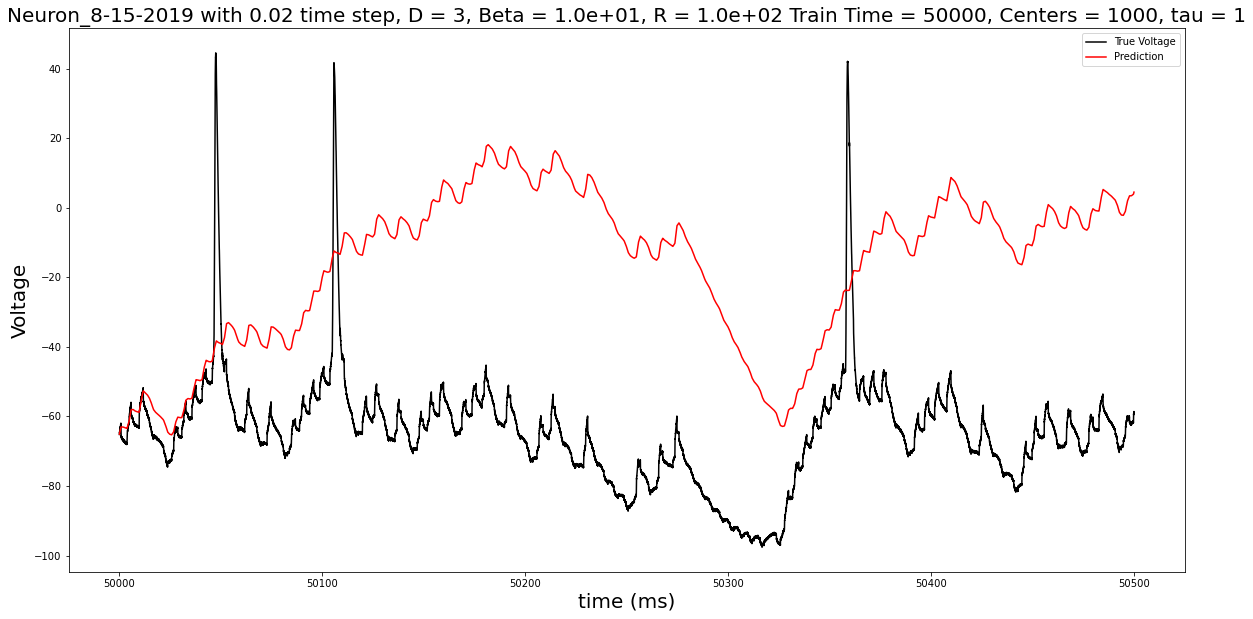

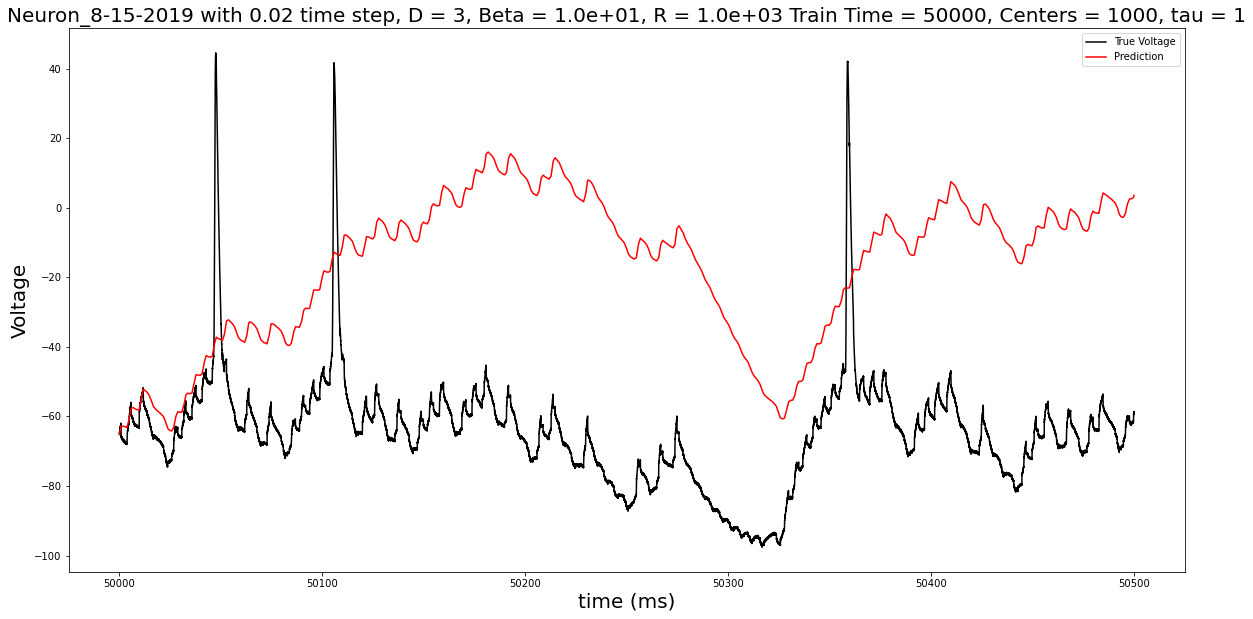

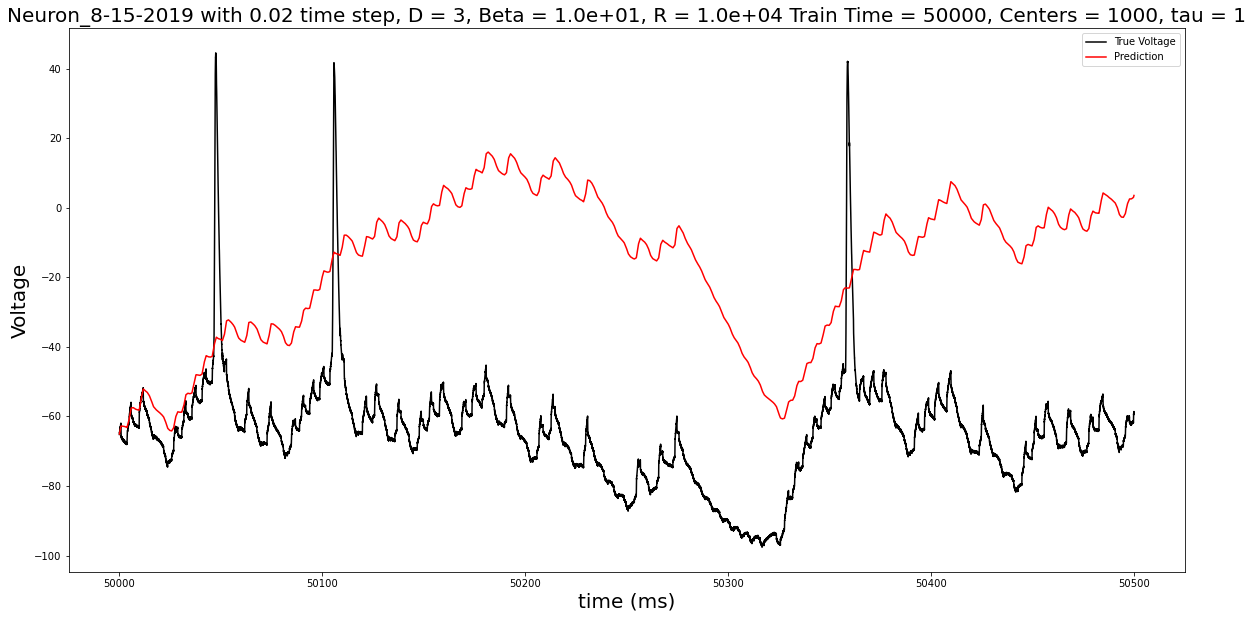

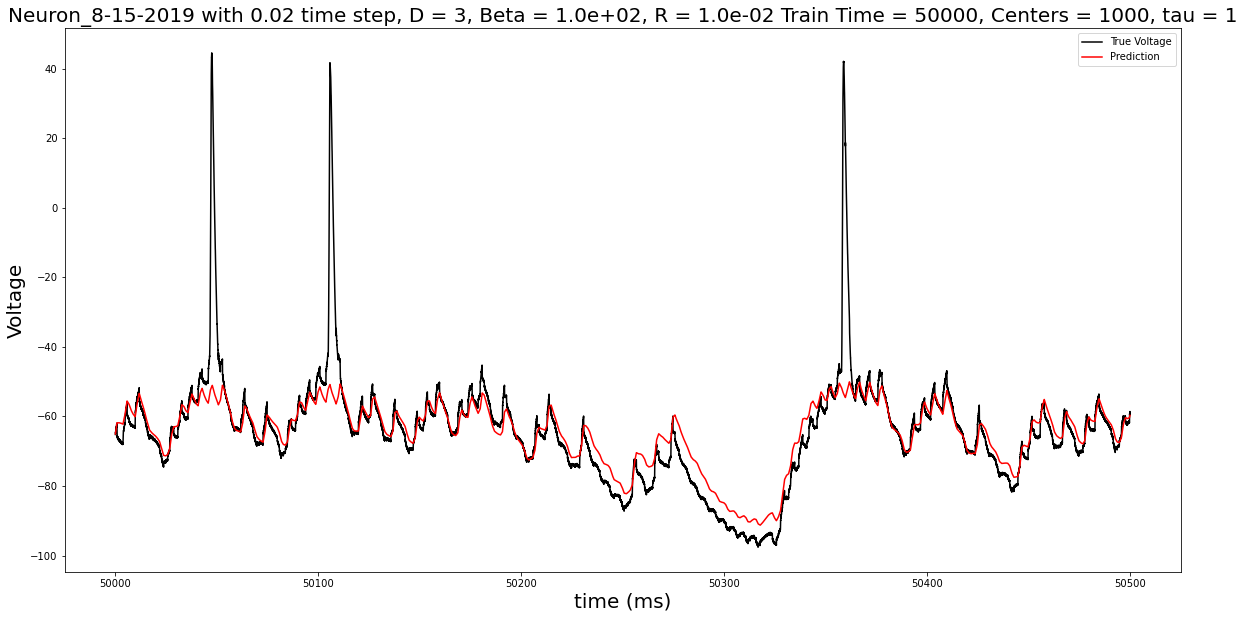

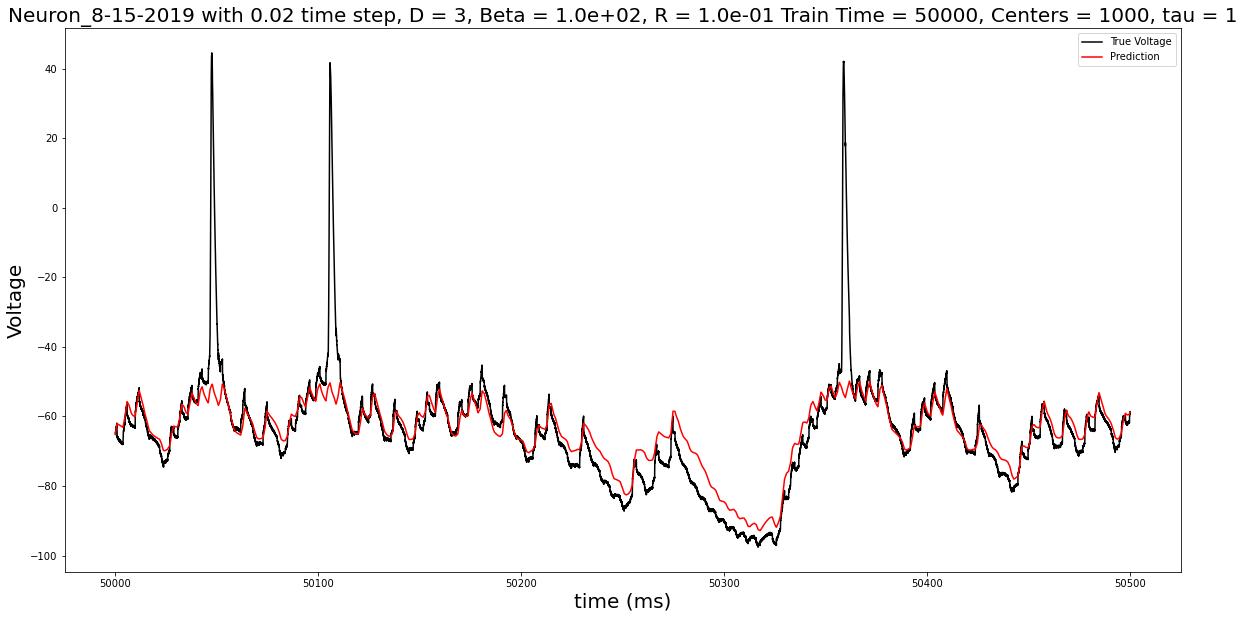

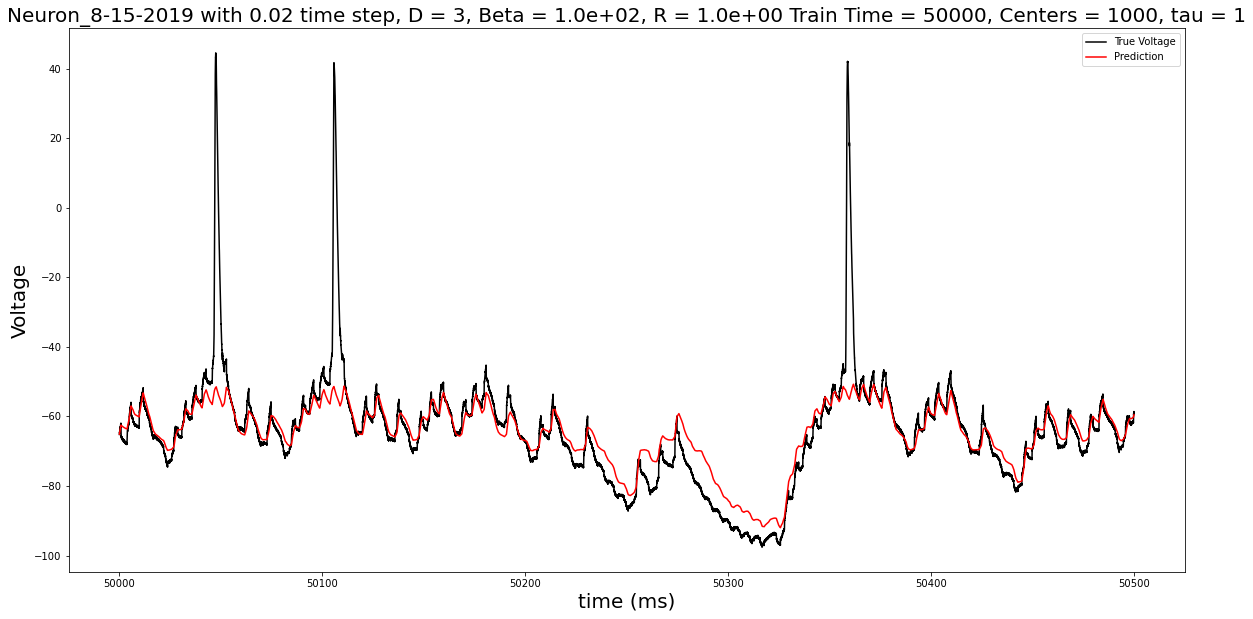

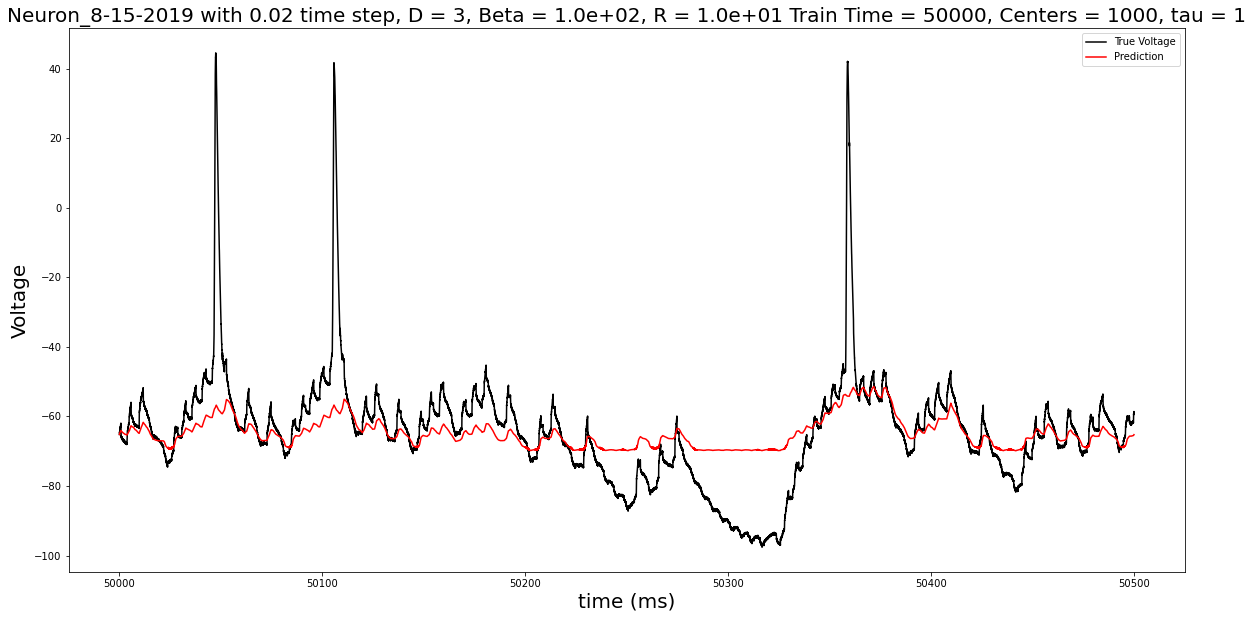

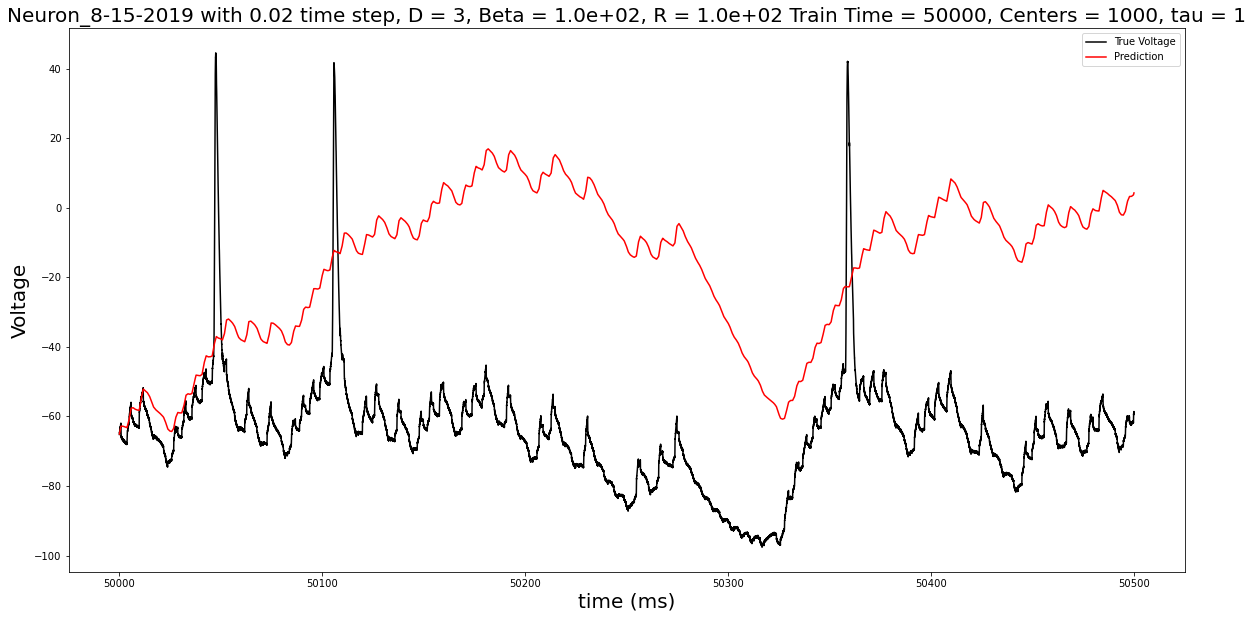

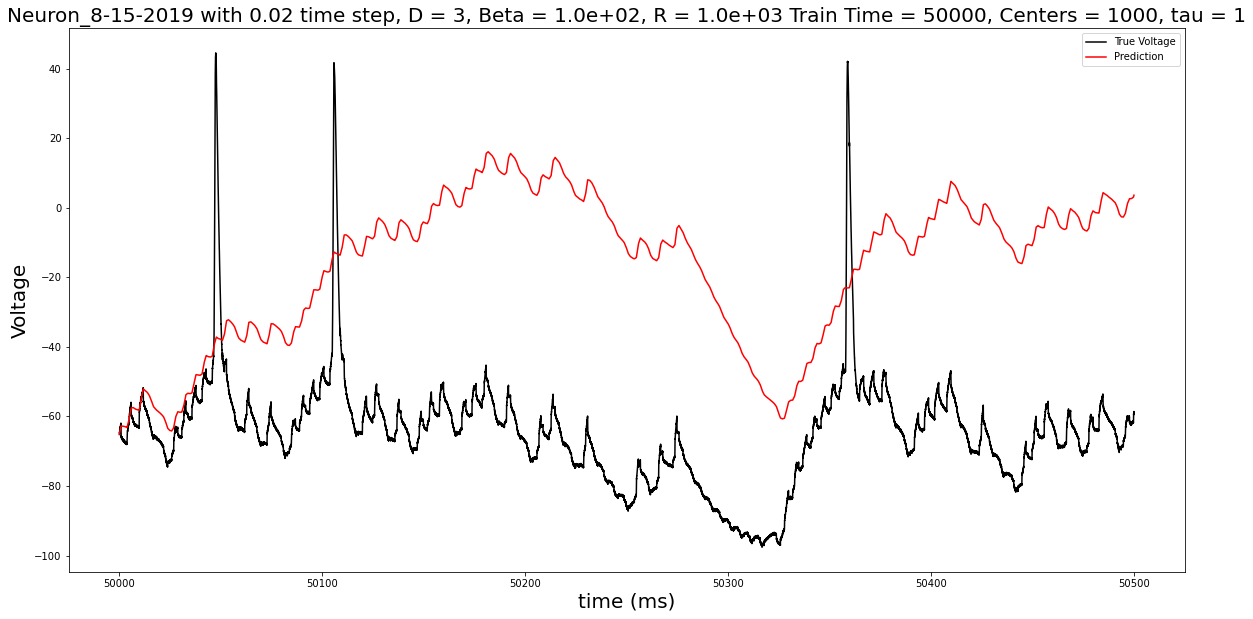

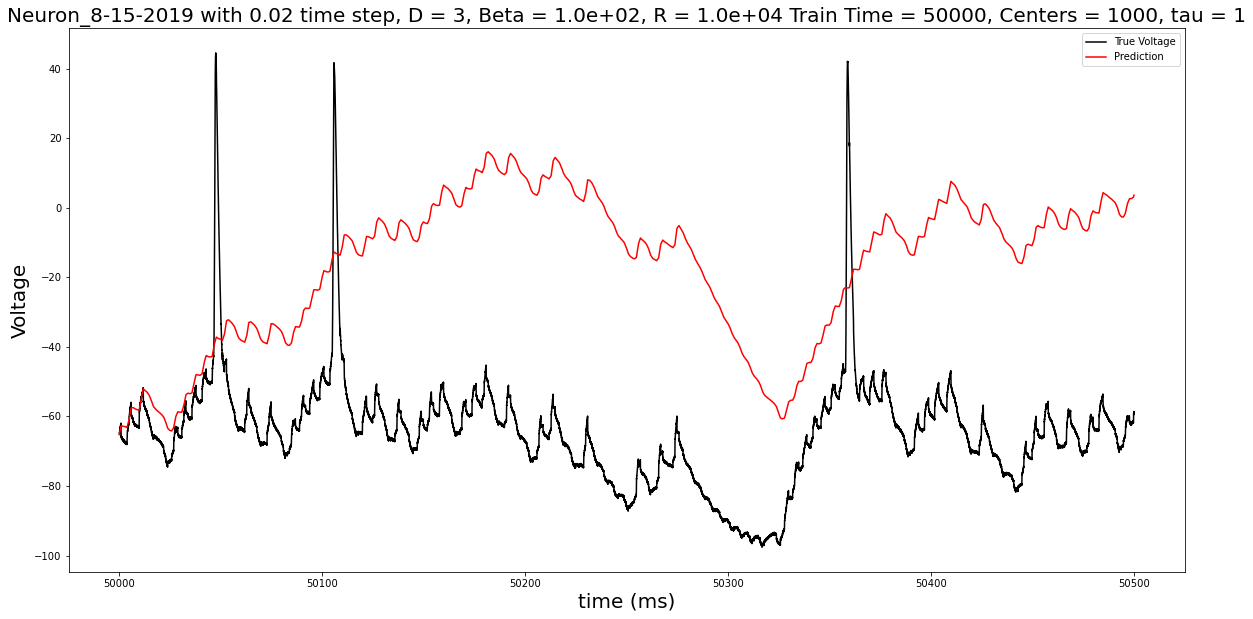

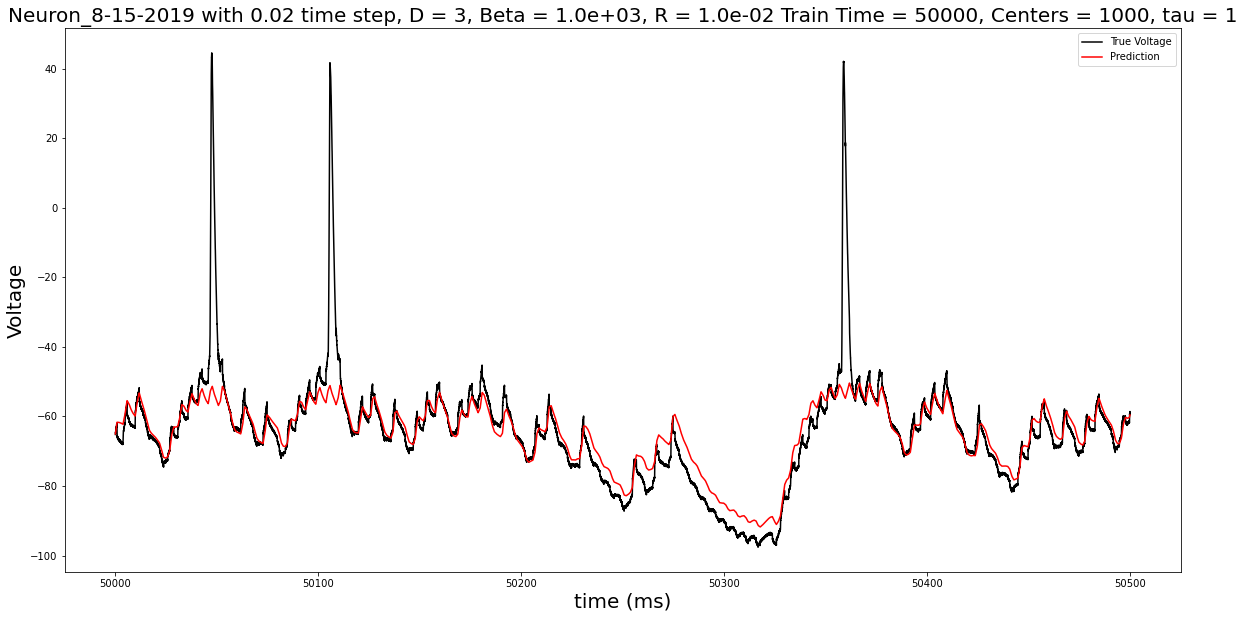

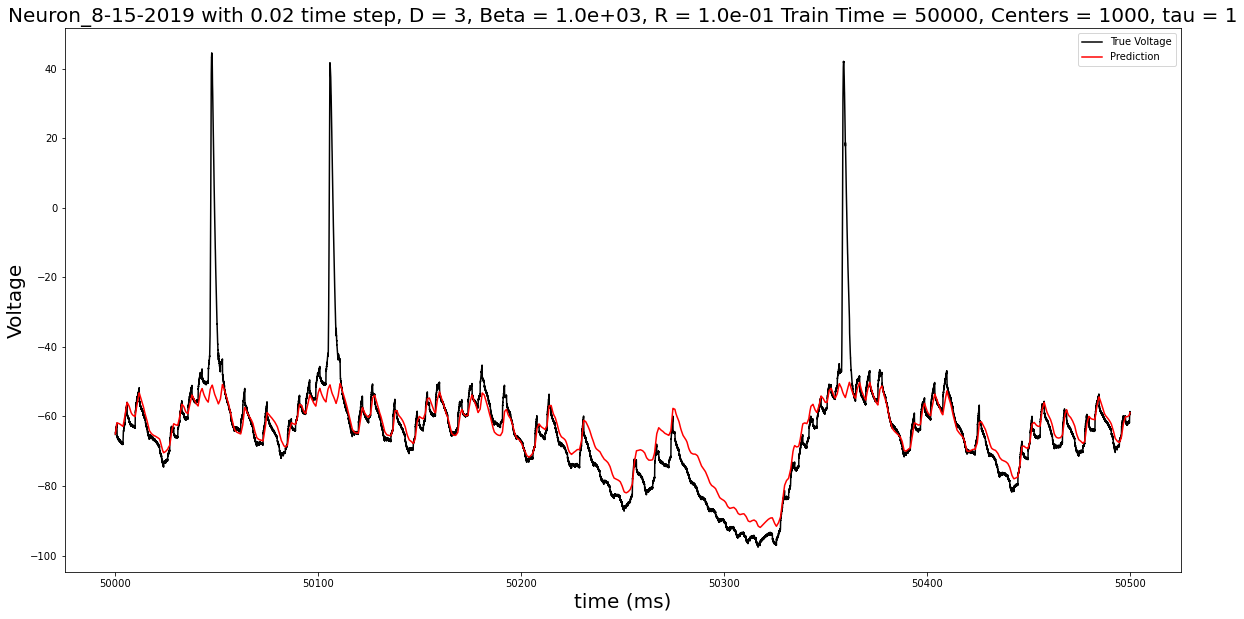

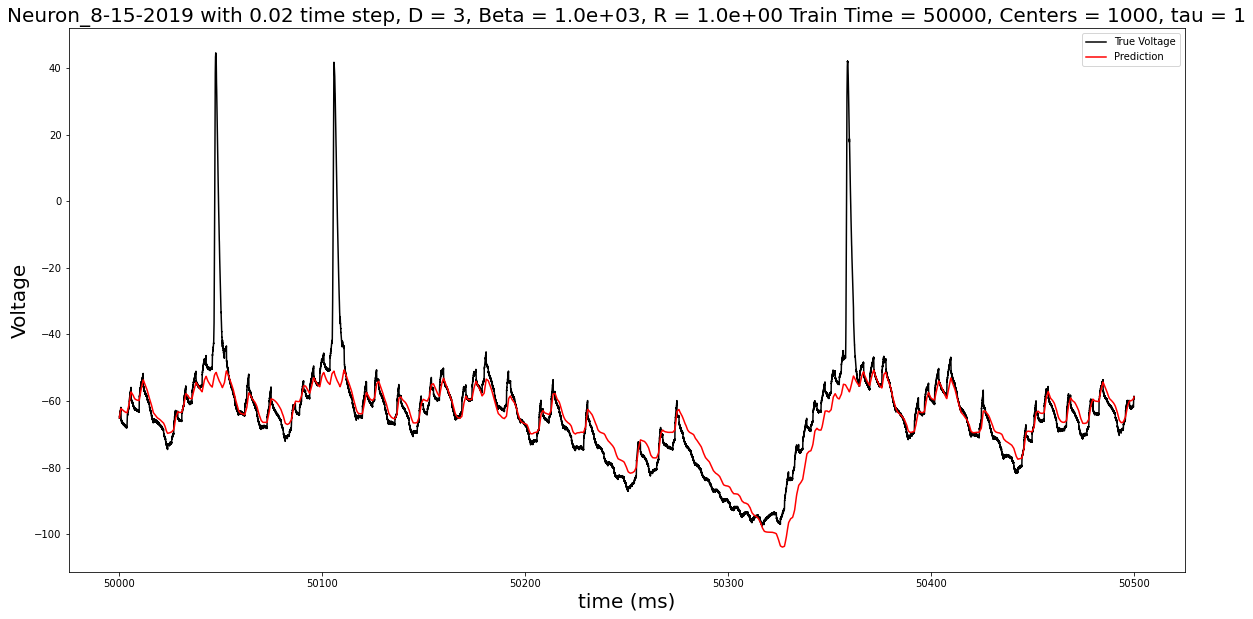

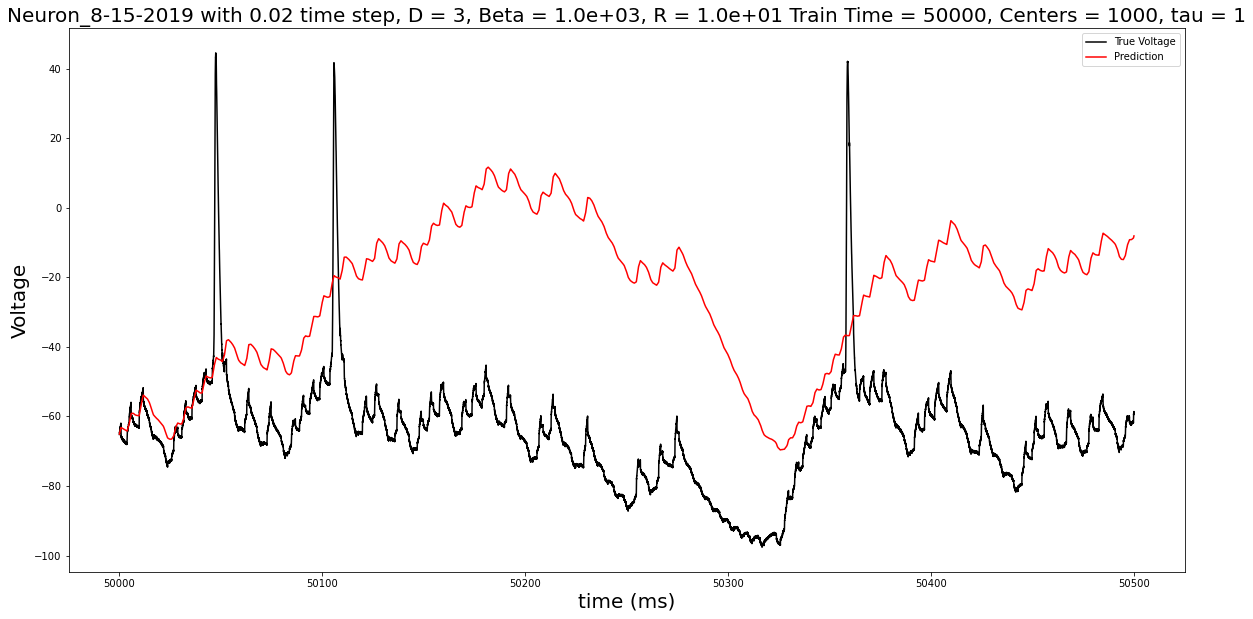

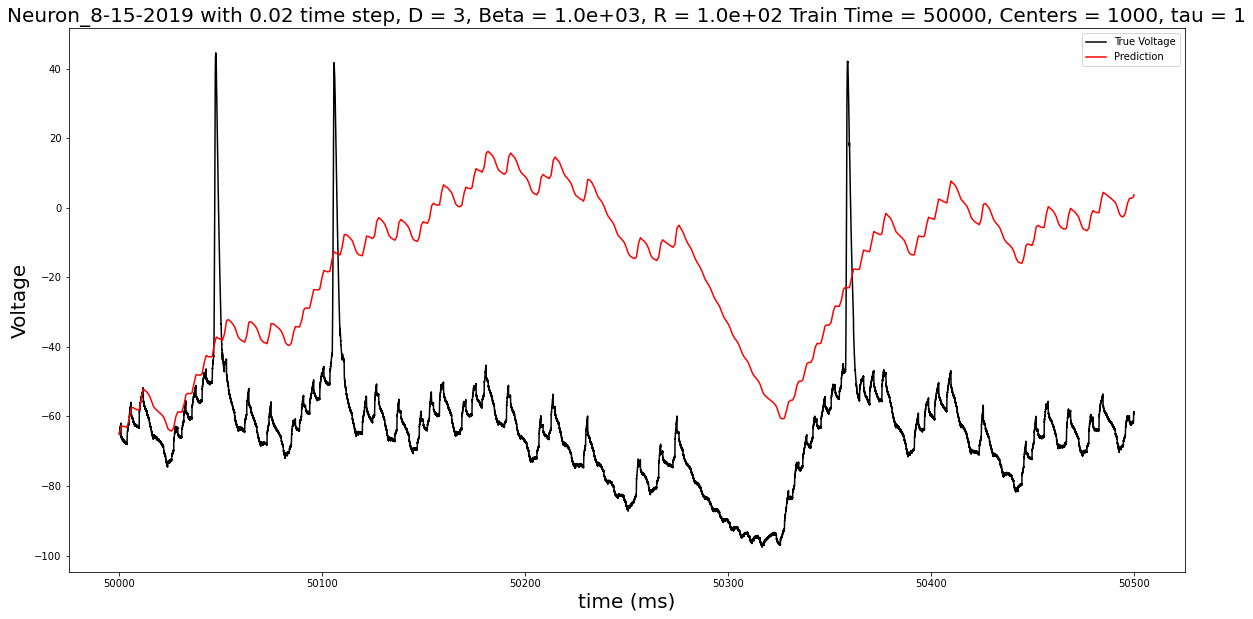

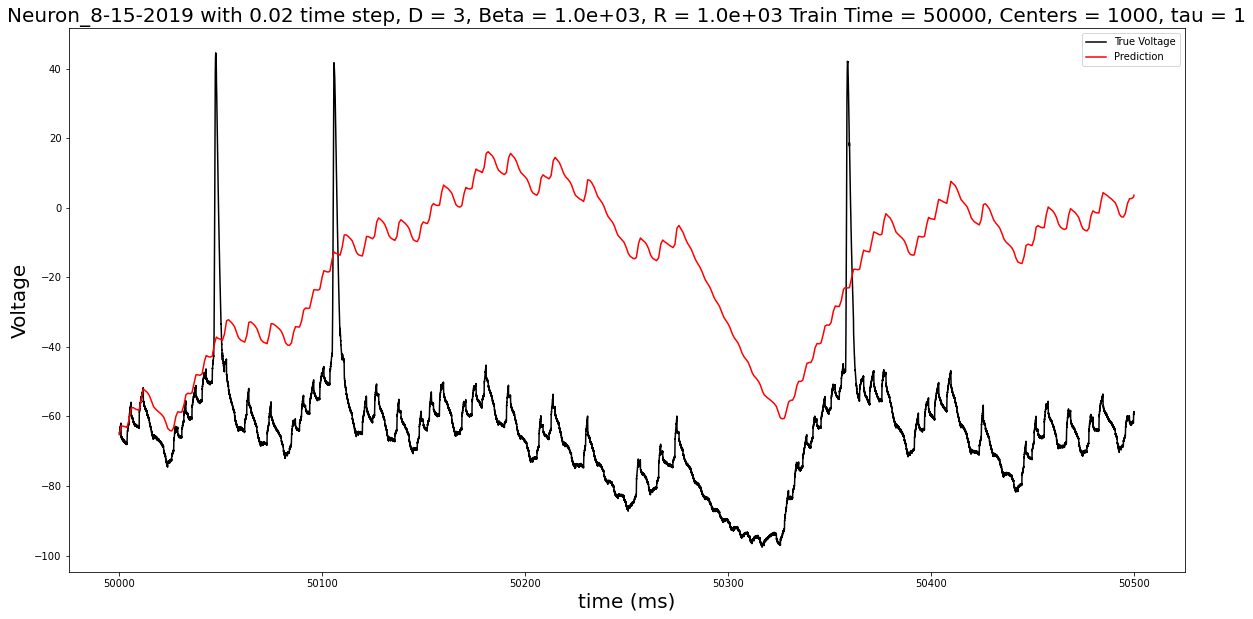

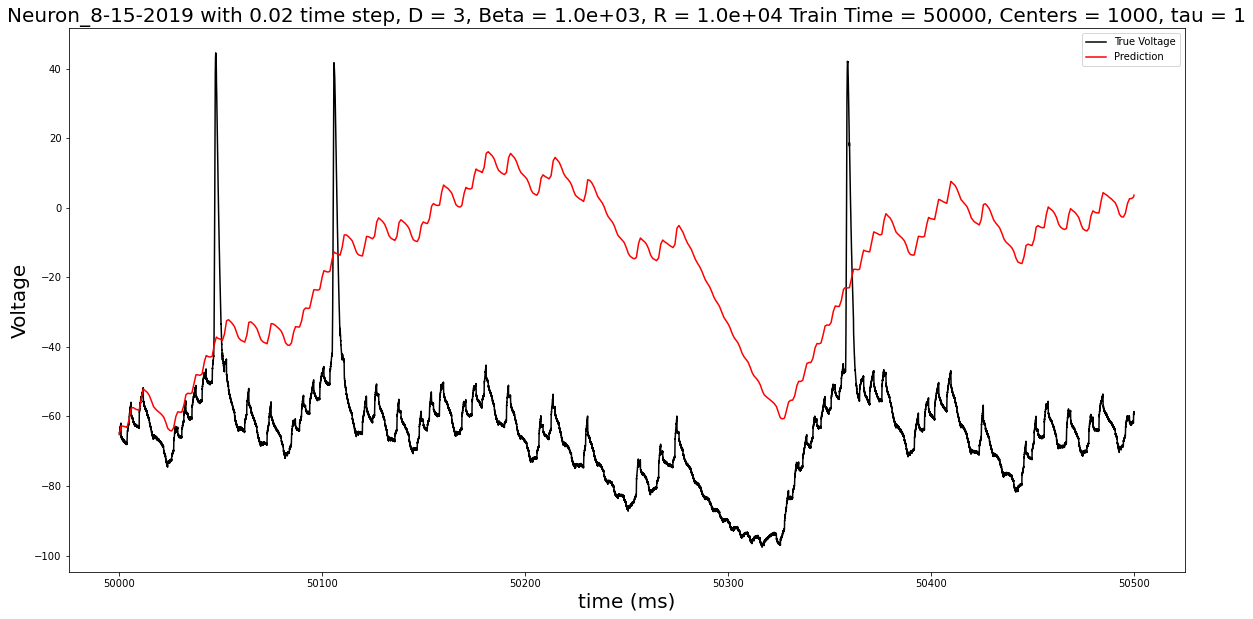

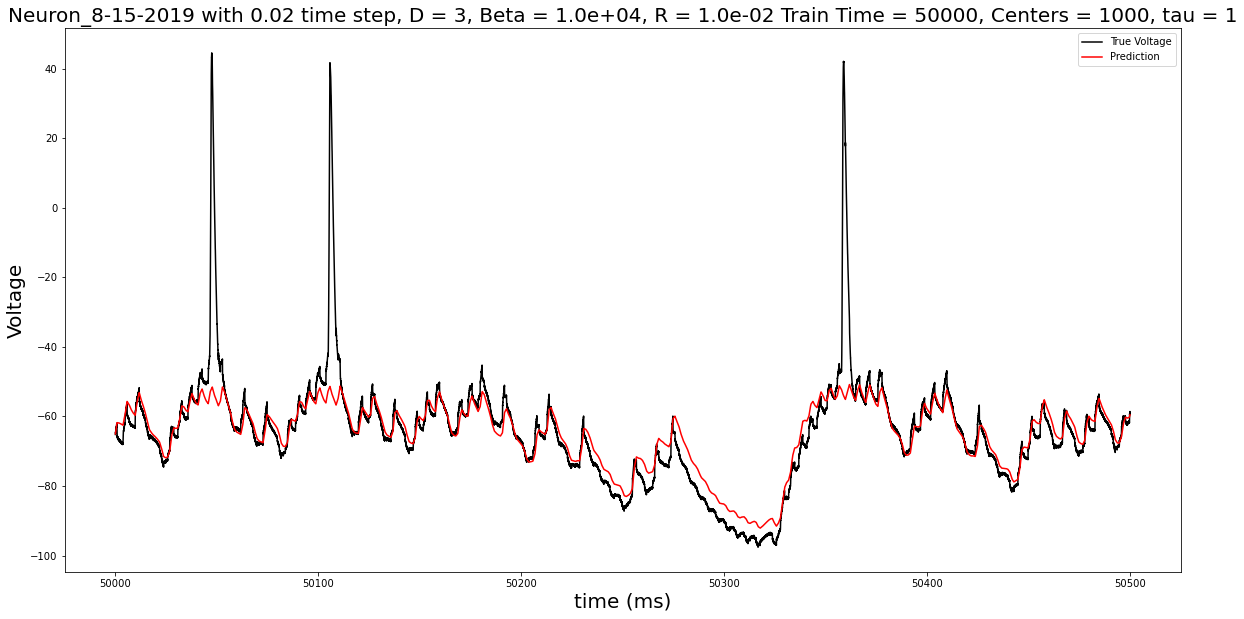

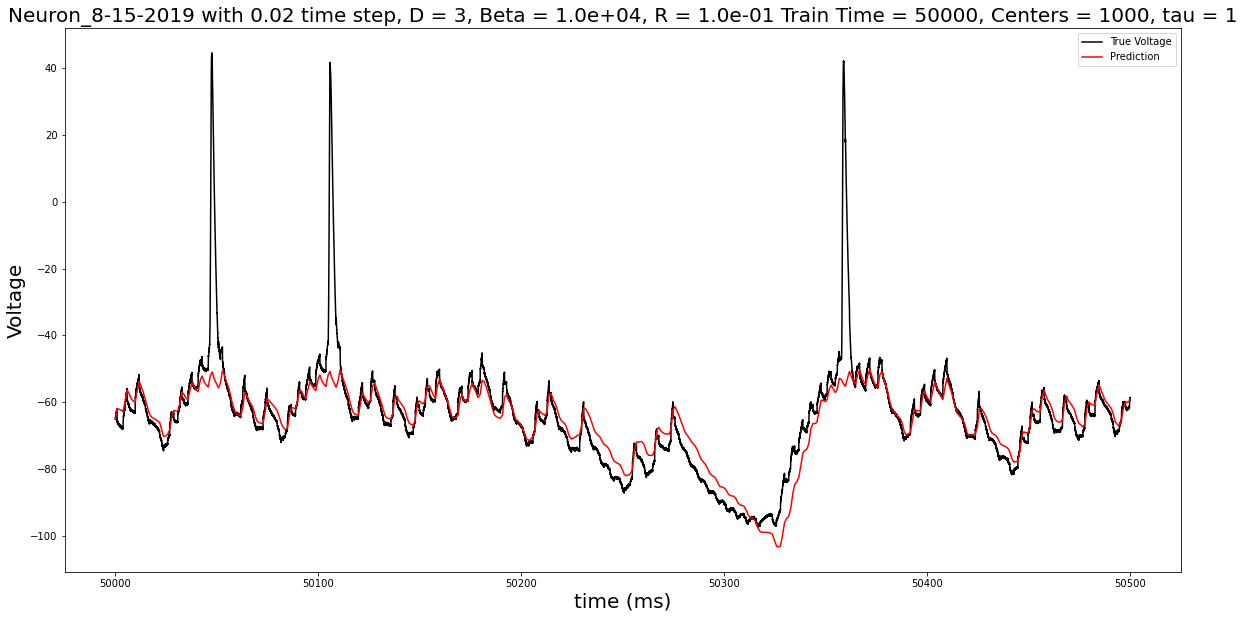

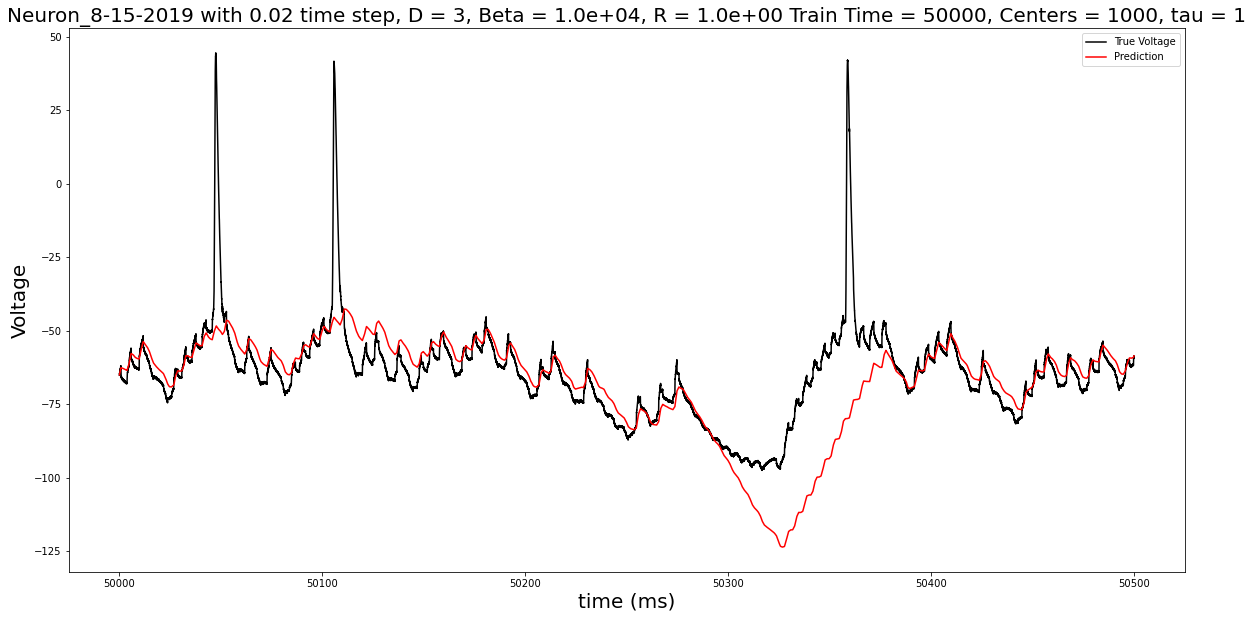

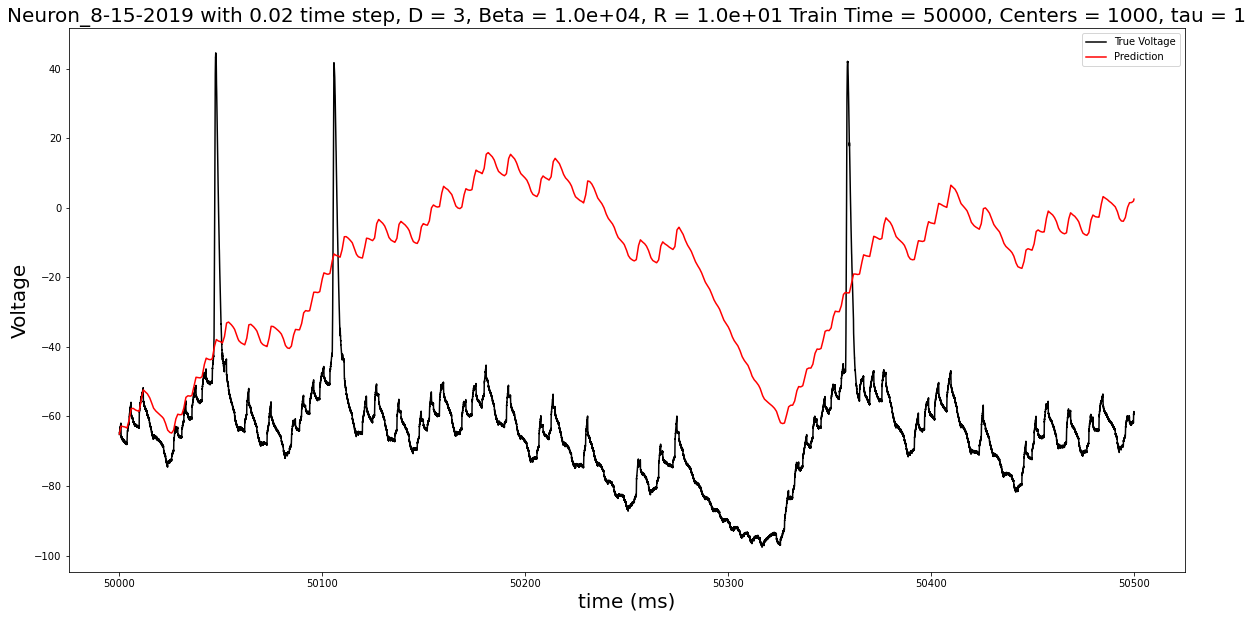

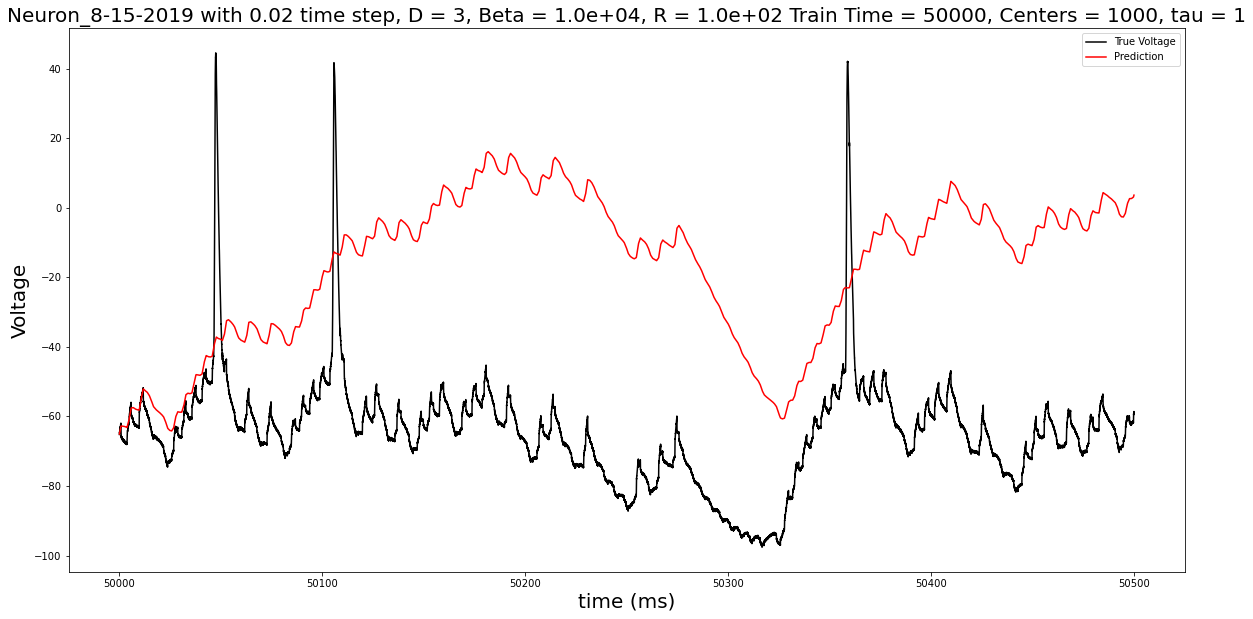

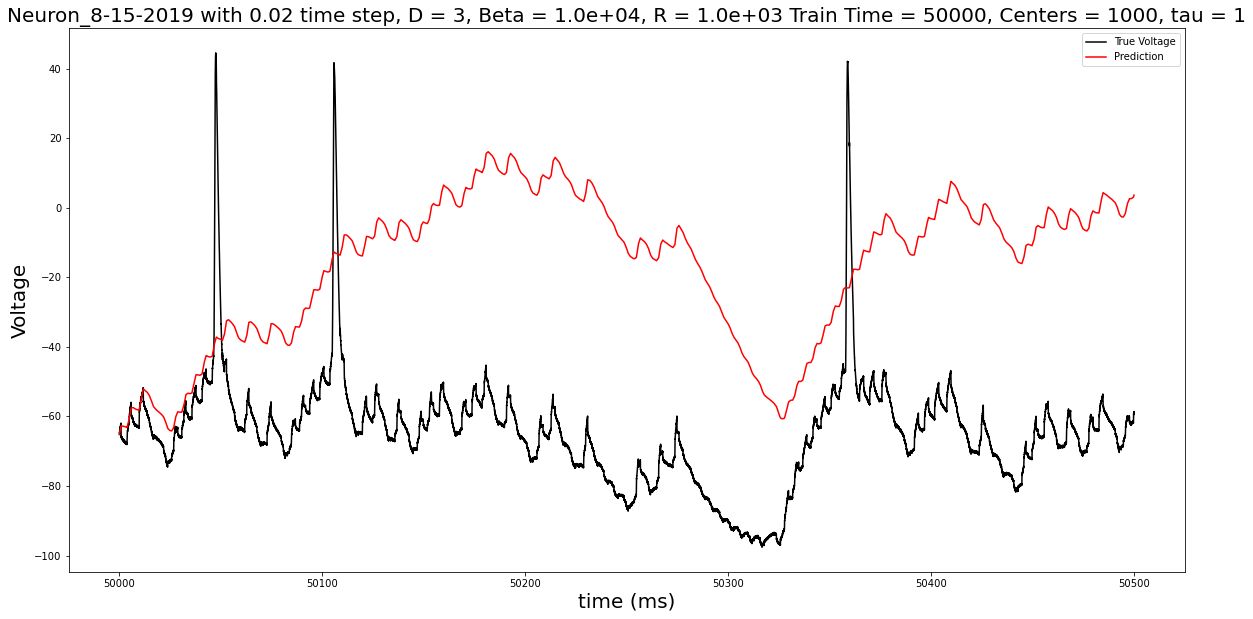

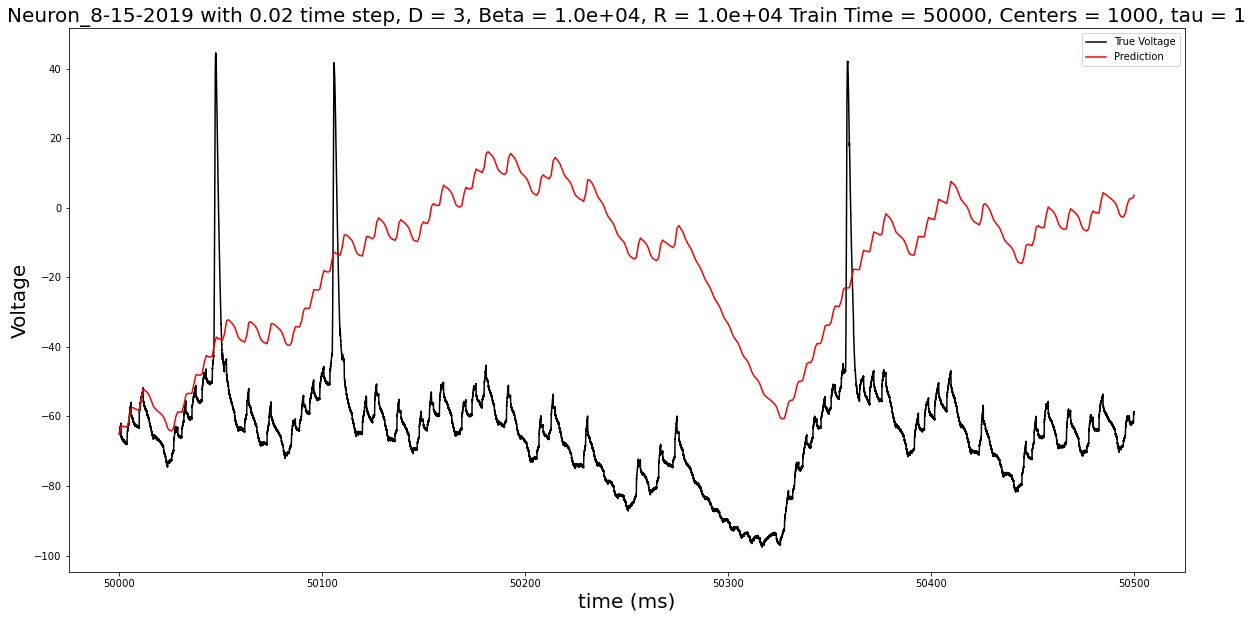

In [28]:
for beta in beta_arr:
    for R in R_arr:
        title = neuron_name_list[use_neuron_index]+' with 0.02 time step, D = 3, Beta = '+str("{:.1e}".format(beta))+', R = '+str("{:.1e}".format(R))+' Train Time = 50000, Centers = 1000, tau = '+str(tau)
        print(R)
        F = DDF.FuncApproxF(Xdata,length,Center,beta,R,D,stim,tau)
        PredValidation = DDF.PredictIntoTheFuture(F,PreLength,stim[bias-1:],Pdata[bias-1-(D-1)*tau:])
        # Tau8
        plt.figure(figsize=(20,10))
        plt.plot(X,Pdata[bias:bias + PreLength],label = 'True Voltage', color = 'black')
        plt.plot(X,PredValidation[tau*(D-1)+1:tau*(D-1)+PreLength+1],label = 'Prediction', color = 'r')
        plt.xlabel('time (ms)',fontsize=20)
        plt.ylabel('Voltage',fontsize=20)
        plt.legend()
        plt.title(title,fontsize=20)
        #plt.savefig('Validation Prediction Result')
        plt.savefig(title+'.png')
        plt.show

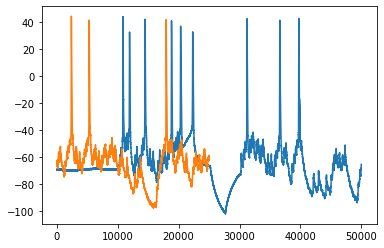

In [29]:
plt.plot(Pdata[:50000])
plt.plot(Pdata[50000:75000])

In [8]:
print("{:.1e}".format(15.000002))

1.5e+01
